In [1929]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Order Items Dataset

In [1930]:
order_items_dataset = pd.read_csv('/home/matsa/Documents/project_sprint02/data/olist_order_items_dataset.csv', 
                            sep=',', encoding='utf-8')

In [1931]:
order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [1932]:
order_items_dataset.shape

(112650, 7)

In [1933]:
order_items_dataset.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [1934]:
productx = order_items_dataset.loc[order_items_dataset.order_id == '00143d0f86d6fbd9f9b38ab440ac16f5']
productx

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1


### Valores faltantes

In [1935]:
order_items_dataset.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

### Duplicatas

In [1936]:
order_items_dataset.duplicated().sum()

np.int64(0)

### Excluindo colunas

In [1937]:
columns_drop = order_items_dataset.columns[[4,5,6]]

In [1938]:
order_items_df_cleaned = order_items_dataset.drop(columns=columns_drop, axis=1)

In [1939]:
order_items_df_cleaned.dtypes

order_id         object
order_item_id     int64
product_id       object
seller_id        object
dtype: object

# Order Payments Dataset

In [1940]:
order_payments_dataset = pd.read_csv('/home/matsa/Documents/project_sprint02/data/olist_order_payments_dataset.csv')

In [1941]:
order_payments_dataset.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [1942]:
# procurando pela order_id deixada como exemplo no documento de informações
x = order_payments_dataset.loc[order_payments_dataset.order_id == '00143d0f86d6fbd9f9b38ab440ac16f5']
x

,order_id,payment_sequential,payment_type,payment_installments,payment_value
29413,00143d0f86d6fbd9f9b38ab440ac16f5,1,credit_card,1,109.29


In [1943]:
order_payments_dataset.shape

(103886, 5)

In [1944]:
order_payments_dataset.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

### Valores faltantes

In [1945]:
order_payments_dataset.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

### Duplicatas

In [1946]:
order_payments_dataset.duplicated().sum()

np.int64(0)

### Excluindo colunas

In [1947]:
columns_drop = order_payments_dataset.columns[[1,2,3]]

In [1948]:
order_payments_df_cleaned = order_payments_dataset.drop(columns=columns_drop, axis=1)

In [1949]:
order_payments_df_cleaned.dtypes

order_id          object
payment_value    float64
dtype: object

# Orders Dataset

In [1950]:
orders_dataset = pd.read_csv('/home/matsa/Documents/project_sprint02/data/olist_orders_dataset.csv')

In [1951]:
orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [1952]:
orders_dataset.shape

(99441, 8)

In [1953]:
orders_dataset.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

### Valores faltantes

In [1954]:
orders_dataset.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Excluindo valores nulos que não farão falta na análise

In [1955]:
orders_dataset.dropna(axis=0, inplace=True)

In [1956]:
orders_dataset.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

### Duplicatas

In [1957]:
orders_dataset.duplicated().value_counts()

False    96461
Name: count, dtype: int64

### Filtrando últimos 12 meses

Convertendo a data do tipo object para date_time, assim fica mais simples manipular as datas

In [1958]:
orders_dataset['order_approved_at'] = pd.to_datetime(orders_dataset.order_approved_at)

In [1959]:
orders_dataset.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp                 object
order_approved_at                datetime64[ns]
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date            object
dtype: object

Calculando o intervalo de 12 meses

In [1960]:
last_order_date = orders_dataset.order_approved_at.max()
last_order_date

Timestamp('2018-08-29 15:10:26')

In [1961]:
# Subtraindo 12 meses da data máxima
min_order_date = last_order_date - pd.DateOffset(months=12)
min_order_date

Timestamp('2017-08-29 15:10:26')

Filtragem por datas maiores ou igual a mínima e menores ou igual a máxima.

In [1962]:
orders_dataset = orders_dataset.loc[(orders_dataset.order_approved_at >= min_order_date) &
                                    (orders_dataset.order_approved_at <= last_order_date)]

In [1963]:
orders_dataset.shape

(74641, 8)

In [1964]:
orders_dataset.order_approved_at.max()

Timestamp('2018-08-29 15:10:26')

In [1965]:
orders_dataset.order_approved_at.min()

Timestamp('2017-08-29 15:35:27')

### Excluindo colunas

In [1966]:
columns_drop = orders_dataset.columns[[3,5,6,7]]

In [1967]:
orders_df_cleaned = orders_dataset.drop(columns=columns_drop, axis=1)

In [1968]:
orders_df_cleaned.columns

Index(['order_id', 'customer_id', 'order_status', 'order_approved_at'], dtype='object')

# Products Dataset

In [1969]:
products_dataset = pd.read_csv('/home/matsa/Documents/project_sprint02/data/olist_products_dataset.csv', 
                            sep=',', encoding='utf-8')

products_dataset.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [1970]:
products_dataset.shape

(32951, 9)

In [1971]:
products_dataset.dtypes

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

### Valores faltantes

In [1972]:
products_dataset.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

A ideia é excluir apenas os registros em que o **'product_category_name' é NaN**, pois registros com esse valor faltante não vão auxiliar na análise

In [1973]:
products_dataset = products_dataset.dropna(subset=['product_category_name'], axis=0) 

In [1974]:
products_dataset.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              1
product_length_cm             1
product_height_cm             1
product_width_cm              1
dtype: int64

### Removendo colunas

Tomei como conclusão que as colunas abaixo não vão auxiliar na análise

In [1975]:
columns_drop = products_dataset.columns[[2,3,4,5,6,7,8]]

In [1976]:
products_df_cleaned = products_dataset.drop(columns=columns_drop, axis=1)

In [1977]:
products_df_cleaned.columns

Index(['product_id', 'product_category_name'], dtype='object')

### Duplicatas

In [1978]:
products_df_cleaned.duplicated().value_counts()

False    32341
Name: count, dtype: int64

# Customers Dataset

In [1979]:
customers_dataset = pd.read_csv('/home/matsa/Documents/project_sprint02/data/olist_customers_dataset.csv', 
                            sep=',', encoding='utf-8')

In [1980]:
customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [1981]:
customers_dataset.shape

(99441, 5)

In [1982]:
customers_dataset.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

### Valores faltantes

In [1983]:
customers_dataset.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

### Duplicatas

In [1984]:
customers_dataset.duplicated().value_counts()

False    99441
Name: count, dtype: int64

As duplicatas são clientes que realizaram compras mais de uma vez

In [1985]:
customers_dataset.customer_unique_id.duplicated().value_counts()

customer_unique_id
False    96096
True      3345
Name: count, dtype: int64

### Excluindo colunas

In [1986]:
columns_drop = customers_dataset.columns[[2,3,4]]

In [1987]:
customers_df_cleaned = customers_dataset.drop(columns=columns_drop, axis=1)

In [1988]:
customers_df_cleaned.columns

Index(['customer_id', 'customer_unique_id'], dtype='object')

# Sellers Dataset

In [1989]:
sellers_dataset = pd.read_csv('/home/matsa/Documents/project_sprint02/data/olist_sellers_dataset.csv', 
                            sep=',', encoding='utf-8')

In [1990]:
sellers_dataset.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [1991]:
sellers_dataset.dtypes

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

In [1992]:
sellers_dataset.shape

(3095, 4)

### Valores faltantes

In [1993]:
sellers_dataset.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

### Duplicatas

In [1994]:
sellers_dataset.duplicated().sum()

np.int64(0)

In [1995]:
sellers_dataset.duplicated().value_counts()

False    3095
Name: count, dtype: int64

### Excluindo colunas

In [1996]:
columns_drop = sellers_dataset.columns[[1,2,3]]

In [1997]:
sellers_df_cleaned = sellers_dataset.drop(columns=columns_drop, axis=1)

In [1998]:
sellers_df_cleaned.dtypes

seller_id    object
dtype: object

# Order Reviews Dataset

In [1999]:
order_reviews_dataset = pd.read_csv('/home/matsa/Documents/project_sprint02/data/olist_order_reviews_dataset.csv', 
                            sep=',', encoding='utf-8')

**Melhor review = 5**

**Pior review = 1**

In [2000]:
order_reviews_dataset

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [2001]:
order_reviews_dataset.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [2002]:
order_reviews_dataset.shape

(99224, 7)

### Valores faltantes

In [2003]:
order_reviews_dataset.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

**Preenchendo valores faltantes**

In [2004]:
order_reviews_dataset['review_comment_title'] = order_reviews_dataset['review_comment_title'].fillna('Nenhum título')

In [2005]:
order_reviews_dataset['review_comment_message'] = order_reviews_dataset['review_comment_message'].fillna('Nenhuma mensagem')

In [2006]:
order_reviews_dataset.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,Nenhum título,Nenhuma mensagem,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,Nenhum título,Nenhuma mensagem,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,Nenhum título,Nenhuma mensagem,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Nenhum título,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Nenhum título,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### Duplicatas

In [2007]:
order_reviews_dataset.duplicated().sum()

np.int64(0)

### Excluindo colunas

In [2008]:
columns_drop = order_reviews_dataset.columns[[5,6]]
columns_drop

Index(['review_creation_date', 'review_answer_timestamp'], dtype='object')

In [2009]:
order_reviews_df_cleaned = order_reviews_dataset.drop(columns=columns_drop, axis=1)

In [2010]:
order_reviews_df_cleaned.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message'],
      dtype='object')

# ---------------------------------------------------------------------------------------------------------------------

# Quais são as categorias com maior e menor receita?

### Merge 

- Order Items com Products

In [2011]:
merged_df = pd.merge(order_items_df_cleaned, products_df_cleaned, on='product_id', how='inner')
merged_df.head()

,order_id,order_item_id,product_id,seller_id,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,ferramentas_jardim


- Orders

In [2012]:
merged_df = pd.merge(merged_df, orders_df_cleaned, on='order_id', how='inner')
merged_df.head()

,order_id,order_item_id,product_id,seller_id,product_category_name,customer_id,order_status,order_approved_at
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 09:45:35
1,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,moveis_decoracao,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:48:30
2,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,perfumaria,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:10:18
3,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,telefonia,32e2e6ab09e778d99bf2e0ecd4898718,delivered,2017-12-10 12:10:31
4,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,ferramentas_jardim,9ed5e522dd9dd85b4af4a077526d8117,delivered,2018-07-05 16:35:48


- Order Payments

In [2013]:
merged_df = pd.merge(merged_df, order_payments_df_cleaned, on='order_id', how='inner')
merged_df.head()

,order_id,order_item_id,product_id,seller_id,product_category_name,customer_id,order_status,order_approved_at,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 09:45:35,72.19
1,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,moveis_decoracao,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:48:30,216.87
2,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,perfumaria,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:10:18,25.78
3,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,telefonia,32e2e6ab09e778d99bf2e0ecd4898718,delivered,2017-12-10 12:10:31,31.75
4,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,ferramentas_jardim,9ed5e522dd9dd85b4af4a077526d8117,delivered,2018-07-05 16:35:48,880.75


### Valores faltantes

In [2014]:
merged_df.isnull().sum()

order_id                 0
order_item_id            0
product_id               0
seller_id                0
product_category_name    0
customer_id              0
order_status             0
order_approved_at        0
payment_value            0
dtype: int64

### Duplicatas

In [2015]:
merged_df.duplicated().sum()

np.int64(432)

**Excluindo as duplicatas utilizando como parâmetros as chaves que uniram os dataframes**

In [2016]:
final_merged_df = merged_df.drop_duplicates(subset=(['order_id', 'product_id']))

In [2017]:
final_merged_df.shape

(76536, 9)

In [2018]:
final_merged_df.duplicated().sum()

np.int64(0)

### Agrupando pela categoria e o valor de pagamento

In [2019]:
group_by_category_payment = final_merged_df.groupby('product_category_name')['payment_value']

In [2020]:
# somando os payment values correspondentes as suas categorias
group_by_category_payment = group_by_category_payment.sum()

In [2021]:
df_category_payment = group_by_category_payment.reset_index()

In [2022]:
df_category_payment

,product_category_name,payment_value
0,agro_industria_e_comercio,69712.97
1,alimentos,30414.63
2,alimentos_bebidas,18032.24
3,artes,19136.30
4,artes_e_artesanato,2107.54
...,...,...
68,sinalizacao_e_seguranca,29107.49
69,tablets_impressao_imagem,3047.04
70,telefonia,309299.36
71,telefonia_fixa,48757.20


Ordenando pelo valor de pagamento

In [2023]:
df_category_payment_sorted = df_category_payment.sort_values(by=['payment_value'], ascending=False)

**Categorias com maior e menor receita**

beleza_saude - 1162367.44

seguro_e_servicos - 115.45

In [2024]:
df_category_payment_sorted

,product_category_name,payment_value
11,beleza_saude,1162367.44
13,cama_mesa_banho,1087220.94
66,relogios_presentes,1075412.05
32,esporte_lazer,888087.37
44,informatica_acessorios,850116.27
...,...,...
60,pc_gamer,883.57
15,casa_conforto_2,643.15
17,cds_dvds_musicais,478.45
37,fashion_roupa_infanto_juvenil,475.50


### Visualização através do gráfico de barras

In [2025]:
top_10_categories = df_category_payment_sorted.head(10)

In [2026]:
bottom_10_categories = df_category_payment_sorted.tail(10)

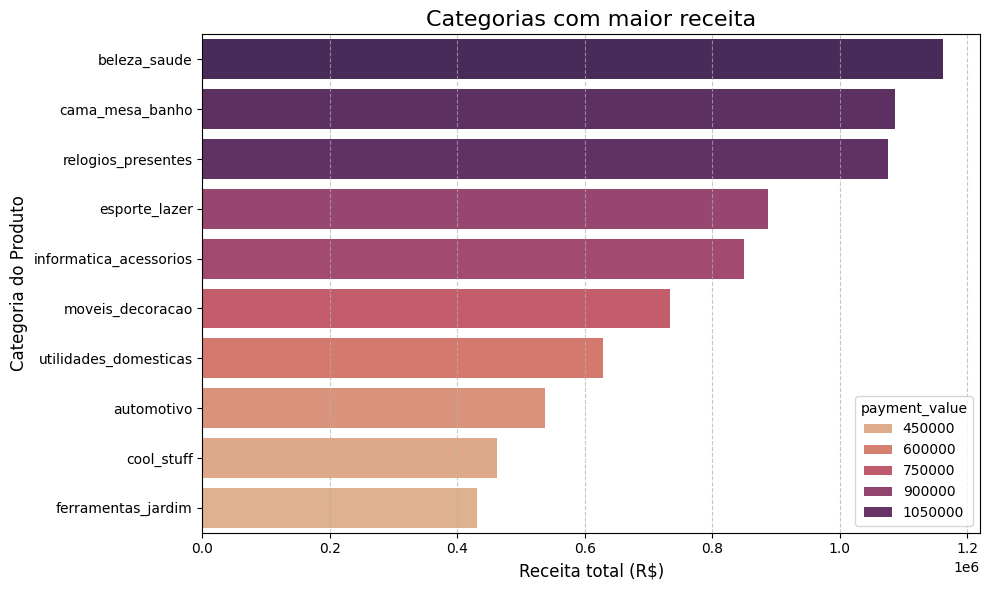

In [2027]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_10_categories, x='payment_value', y='product_category_name', palette='flare', hue='payment_value')

plt.title('Categorias com maior receita', fontsize=16)
plt.xlabel('Receita total (R$)', fontsize=12)
plt.ylabel('Categoria do Produto', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

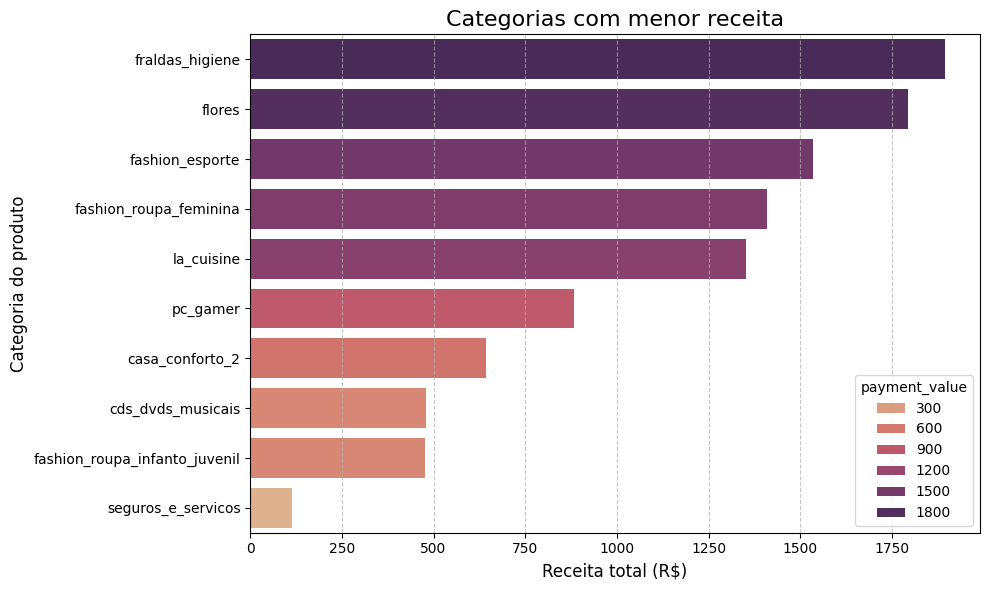

In [2028]:
plt.figure(figsize=(10,6))
sns.barplot(data=bottom_10_categories, x='payment_value', y='product_category_name', hue='payment_value', palette='flare')

plt.title('Categorias com menor receita', fontsize=16)
plt.xlabel('Receita total (R$)', fontsize=12)
plt.ylabel('Categoria do produto', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

# Top 10 maiores sellers(com maior receita)

In [2029]:
sellers_df_cleaned.head()

,seller_id
0,3442f8959a84dea7ee197c632cb2df15
1,d1b65fc7debc3361ea86b5f14c68d2e2
2,ce3ad9de960102d0677a81f5d0bb7b2d
3,c0f3eea2e14555b6faeea3dd58c1b1c3
4,51a04a8a6bdcb23deccc82b0b80742cf


In [2030]:
order_items_df_cleaned.head()

,order_id,order_item_id,product_id,seller_id
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87


In [2031]:
orders_df_cleaned.head()

,order_id,customer_id,order_status,order_approved_at
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 03:24:27
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:55:23
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:45:59
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 22:20:29


**Excluindo colunas que não fazem sentido para análise do dataframe orders**

In [2032]:
columns_drop = orders_df_cleaned.columns[[1,2,3]]

In [2033]:
orders_df_cleaned2 = orders_df_cleaned.drop(columns=columns_drop, axis=1)

In [2034]:
orders_df_cleaned2.head()

,order_id
0,e481f51cbdc54678b7cc49136f2d6af7
1,53cdb2fc8bc7dce0b6741e2150273451
2,47770eb9100c2d0c44946d9cf07ec65d
3,949d5b44dbf5de918fe9c16f97b45f8a
4,ad21c59c0840e6cb83a9ceb5573f8159


### Merges

Merge de sellers com order_items

In [2035]:
merged_df2 = pd.merge(sellers_df_cleaned, order_items_df_cleaned, on='seller_id', how='inner')
merged_df2.head()

,seller_id,order_id,order_item_id,product_id
0,3442f8959a84dea7ee197c632cb2df15,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61
1,3442f8959a84dea7ee197c632cb2df15,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d
2,3442f8959a84dea7ee197c632cb2df15,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4
3,d1b65fc7debc3361ea86b5f14c68d2e2,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff
4,d1b65fc7debc3361ea86b5f14c68d2e2,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f


Merge com orders

In [2036]:
merged_df2 = pd.merge(merged_df2, orders_df_cleaned2, on='order_id', how='inner')
merged_df2.head()

,seller_id,order_id,order_item_id,product_id
0,3442f8959a84dea7ee197c632cb2df15,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4
1,d1b65fc7debc3361ea86b5f14c68d2e2,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff
2,d1b65fc7debc3361ea86b5f14c68d2e2,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f
3,d1b65fc7debc3361ea86b5f14c68d2e2,16fd9b360cbadca08b1026c8532820f5,1,f74ed500ab93d12ce3fbc611474d89af
4,d1b65fc7debc3361ea86b5f14c68d2e2,21fab12baaa93481ad76d02fa22255eb,1,4353af36fe588dc73497fa158ed6cefb


Merge com Order Payments

In [2037]:
merged_df2 = pd.merge(merged_df2, order_payments_df_cleaned, on='order_id', how='inner')
merged_df2.head()

,seller_id,order_id,order_item_id,product_id,payment_value
0,3442f8959a84dea7ee197c632cb2df15,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,158.80
1,d1b65fc7debc3361ea86b5f14c68d2e2,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,135.08
2,d1b65fc7debc3361ea86b5f14c68d2e2,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,221.79
3,d1b65fc7debc3361ea86b5f14c68d2e2,16fd9b360cbadca08b1026c8532820f5,1,f74ed500ab93d12ce3fbc611474d89af,213.09
4,d1b65fc7debc3361ea86b5f14c68d2e2,21fab12baaa93481ad76d02fa22255eb,1,4353af36fe588dc73497fa158ed6cefb,388.01


### Valores faltantes

In [2038]:
merged_df2.isnull().sum()

seller_id        0
order_id         0
order_item_id    0
product_id       0
payment_value    0
dtype: int64

### Duplicatas

In [2039]:
merged_df2.duplicated().sum()

np.int64(448)

**Excluindo as duplicatas utilizando como parâmetros as chaves que uniram os dataframes**

In [2040]:
final_merged_df2 = merged_df2.drop_duplicates(subset=(['seller_id', 'order_id']))

In [2041]:
final_merged_df2.duplicated().sum()

np.int64(0)

### Agrupando por seller e payment value

In [2042]:
group_by_seller_payment = final_merged_df2.groupby('seller_id')['payment_value']

In [2043]:
group_by_seller_payment = group_by_seller_payment.sum().reset_index()

In [2044]:
group_by_seller_payment

,seller_id,payment_value
0,0015a82c2db000af6aaaf3ae2ecb0532,2748.06
1,001cca7ae9ae17fb1caed9dfb1094831,15838.33
2,002100f778ceb8431b7a1020ff7ab48f,2110.33
3,003554e2dce176b5555353e4f3555ac8,139.38
4,004c9cd9d87a3c30c522c48c4fc07416,9830.99
...,...,...
2614,ffad1e7127fb622cb64a900751590acd,1090.83
2615,ffc470761de7d0232558ba5e786e57b7,1856.85
2616,ffdd9f82b9a447f6f8d4b91554cc7dd3,2287.25
2617,ffeee66ac5d5a62fe688b9d26f83f534,2259.55


In [2045]:
df_category_seller_payment = group_by_seller_payment.sort_values(by=['payment_value'], ascending=False)

In [2046]:
df_category_seller_payment

,seller_id,payment_value
751,4869f7a5dfa277a7dca6462dcf3b52b2,221195.68
882,53243585a1d6dc2643021fd1853d8905,214912.99
168,1025f0e2d44d7041d6cf58b6550e0bfa,170025.09
1316,7c67e1448b00f6e969d365cea6b010ab,169568.68
771,4a3ca9315b744ce9f8e9374361493884,159112.63
...,...,...
1992,c1dde11f12d05c478f5de2d7319ad3b2,19.89
759,4965a7002cca77301c82d3f91b82e1a9,16.36
614,3ac588cd562971392504a9e17130c40b,11.46
1754,aa17b35ce4de7b565be3249ba838944f,7.50


**Criando uma coluna para o nome do vendedor**

In [2047]:
df_category_seller_payment['seller_name'] = 'seller' + df_category_seller_payment['seller_id'].str[:4]

In [2048]:
df_category_seller_payment

,seller_id,payment_value,seller_name
751,4869f7a5dfa277a7dca6462dcf3b52b2,221195.68,seller4869
882,53243585a1d6dc2643021fd1853d8905,214912.99,seller5324
168,1025f0e2d44d7041d6cf58b6550e0bfa,170025.09,seller1025
1316,7c67e1448b00f6e969d365cea6b010ab,169568.68,seller7c67
771,4a3ca9315b744ce9f8e9374361493884,159112.63,seller4a3c
...,...,...,...
1992,c1dde11f12d05c478f5de2d7319ad3b2,19.89,sellerc1dd
759,4965a7002cca77301c82d3f91b82e1a9,16.36,seller4965
614,3ac588cd562971392504a9e17130c40b,11.46,seller3ac5
1754,aa17b35ce4de7b565be3249ba838944f,7.50,selleraa17


In [2049]:
# Pegando os 10 primeiros sellers
top_10_sellers = df_category_seller_payment.head(10)

In [2050]:
# Pegando os 10 últimos sellers
bottom_10_sellers = df_category_seller_payment.tail(10)

### Visualização através do gráfico de barras

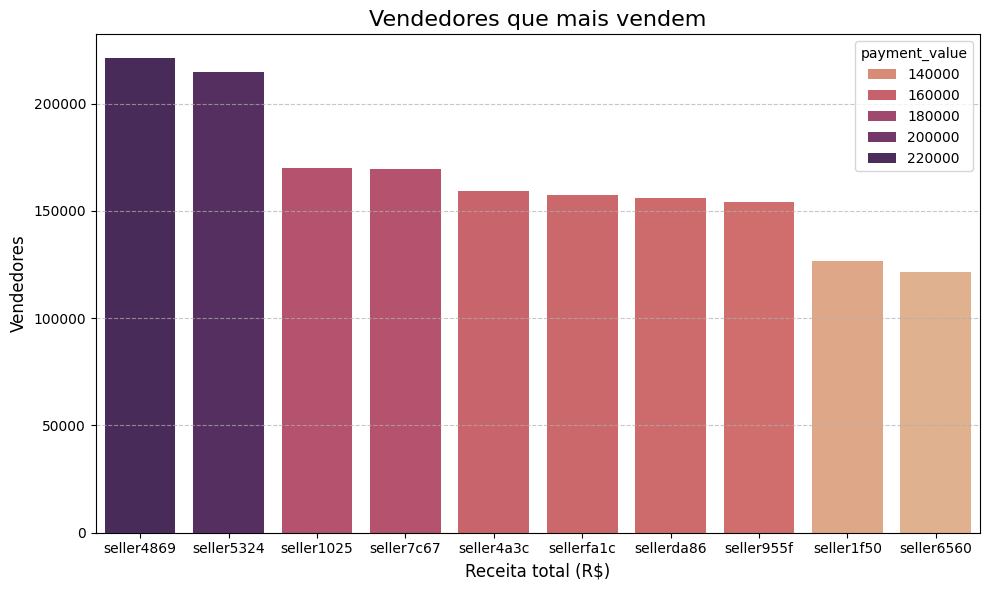

In [2051]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_10_sellers, y='payment_value', x='seller_name', hue='payment_value', palette='flare')

plt.title('Vendedores que mais vendem', fontsize=16)
plt.xlabel('Receita total (R$)', fontsize=12)
plt.ylabel('Vendedores', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

# Top 10 piores sellers(com menor receita)

### Visualização através do gráfico de barras

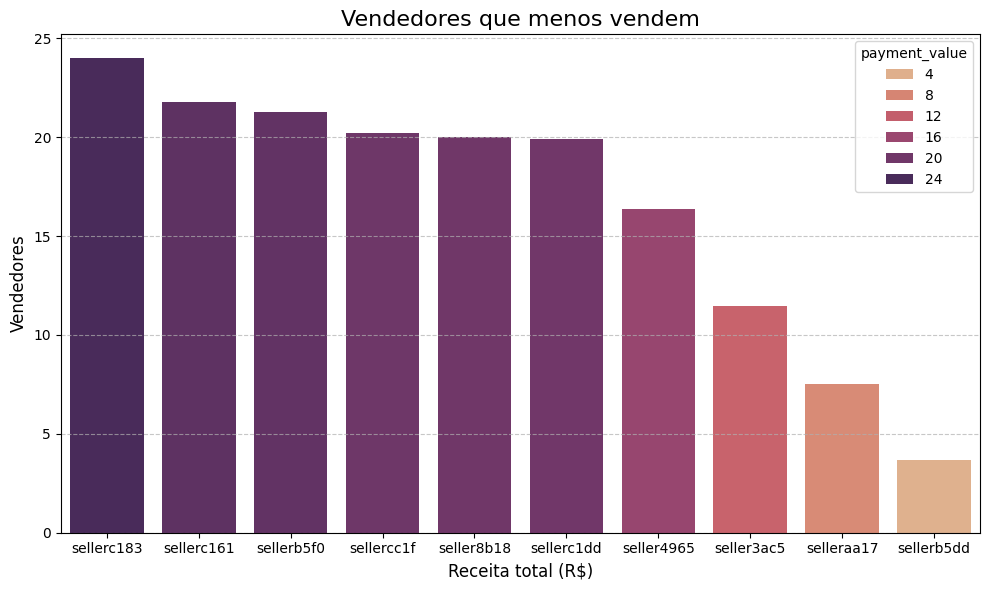

In [2052]:
plt.figure(figsize=(10,6))
sns.barplot(data=bottom_10_sellers, y='payment_value', x='seller_name', hue='payment_value', palette='flare')

# Personalizando o gráfico
plt.title('Vendedores que menos vendem', fontsize=16)
plt.xlabel('Receita total (R$)', fontsize=12)
plt.ylabel('Vendedores', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

# Existem sellers que vendem o mesmo produto? Se sim, quais são? Qual é a variação de preço praticado entre os Sellers?

**Limpando o dataset order_items**

In [2053]:
columns_drop = order_items_dataset.columns[4]
columns_drop

'shipping_limit_date'

In [2054]:
order_items_df_cleaned2 = order_items_dataset.drop(columns=columns_drop, axis=1)
order_items_df_cleaned2.dtypes

order_id          object
order_item_id      int64
product_id        object
seller_id         object
price            float64
freight_value    float64
dtype: object

### Merge

- Sellers e Order Items

In [2055]:
merged_df3 = pd.merge(sellers_df_cleaned, order_items_df_cleaned2, on='seller_id', how='inner')

In [2056]:
merged_df3.head()

,seller_id,order_id,order_item_id,product_id,price,freight_value
0,3442f8959a84dea7ee197c632cb2df15,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,106.20,9.56
1,3442f8959a84dea7ee197c632cb2df15,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,101.70,15.92
2,3442f8959a84dea7ee197c632cb2df15,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,10.80,2.42
3,d1b65fc7debc3361ea86b5f14c68d2e2,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,89.99,45.09
4,d1b65fc7debc3361ea86b5f14c68d2e2,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,199.90,21.89


- Products

In [2057]:
merged_df3 = pd.merge(merged_df3, products_df_cleaned, on='product_id', how='inner')
merged_df3.head()

,seller_id,order_id,order_item_id,product_id,price,freight_value,product_category_name
0,3442f8959a84dea7ee197c632cb2df15,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,106.20,9.56,esporte_lazer
1,3442f8959a84dea7ee197c632cb2df15,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,101.70,15.92,esporte_lazer
2,3442f8959a84dea7ee197c632cb2df15,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,10.80,2.42,esporte_lazer
3,d1b65fc7debc3361ea86b5f14c68d2e2,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,89.99,45.09,malas_acessorios
4,d1b65fc7debc3361ea86b5f14c68d2e2,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,199.90,21.89,papelaria


### Duplicatas

In [2058]:
merged_df3.duplicated().sum()

np.int64(0)

In [2059]:
merged_df3.dtypes

seller_id                 object
order_id                  object
order_item_id              int64
product_id                object
price                    float64
freight_value            float64
product_category_name     object
dtype: object

### Criando colunas seller_name e product_name

In [2060]:
merged_df3['seller_name'] = 'seller' + merged_df3['seller_id'].str[:4]

In [2061]:
merged_df3['product_name'] = 'product' + merged_df3['product_id'].str[:4]

In [2062]:
merged_df3.product_name.value_counts()

product_name
productaca2    532
product4228    494
product99a4    489
product389d    395
product368c    388
              ... 
product1311      1
product617b      1
product00cf      1
productc518      1
product8723      1
Name: count, Length: 25478, dtype: int64

### Agrupamento 

Agrupamento de product_id com a agregação de uma lista de sellers e o menor e maior preço

In [2063]:
group_by_sellers_products = merged_df3.groupby('product_name').agg({
    'seller_name': lambda x: list(set(x)), #remove duplicatas da lista de sellers que vendem o mesmo produto mais de uma vez
    'price': [
        lambda x: list(set(x)), #remove duplicatas dos preços
        'min', 
        'max'
    ]
}).reset_index()

In [2064]:
group_by_sellers_products.head(10)

product_name               seller_name          price                
                                <lambda>     <lambda_0>     min     max
0  product0006              [seller5670]       [101.65]  101.65  101.65
1  product0008              [seller7142]        [129.9]  129.90  129.90
2  product0009              [seller4a3c]        [229.0]  229.00  229.00
3  product000b              [seller40ec]         [58.9]   58.90   58.90
4  product000d              [seller8ae5]        [199.0]  199.00  199.00
5  product0011              [sellerb4ff]         [52.0]   52.00   52.00
6  product0012              [sellercd68]        [249.0]  249.00  249.00
7  product0017              [seller8b32]         [38.9]   38.90   38.90
8  product001b  [seller8a32, sellerd237]  [34.99, 78.9]   34.99   78.90
9  product001c              [seller41b3]         [79.9]   79.90   79.90

**Renomeando as colunas**

In [2065]:
group_by_sellers_products.dtypes

product_name                 object
seller_name   <lambda>       object
price         <lambda_0>     object
              min           float64
              max           float64
dtype: object

In [2066]:
group_by_sellers_products.columns = ['product_name', 'seller_name', 'prices', 'min_price', 'max_price']
group_by_sellers_products.dtypes

/home/matsa/miniconda3/envs/project/lib/python3.13/site-packages/IPython/core/displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


product_name     object
seller_name      object
prices           object
min_price       float64
max_price       float64
dtype: object

**Calculando a variação dos preços**

In [2067]:
group_by_sellers_products['price_variation'] = group_by_sellers_products['max_price'] - group_by_sellers_products['min_price']
group_by_sellers_products

,product_name,seller_name,prices,min_price,max_price,price_variation
0,product0006,[seller5670],[101.65],101.65,101.65,0.0
1,product0008,[seller7142],[129.9],129.90,129.90,0.0
2,product0009,[seller4a3c],[229.0],229.00,229.00,0.0
3,product000b,[seller40ec],[58.9],58.90,58.90,0.0
4,product000d,[seller8ae5],[199.0],199.00,199.00,0.0
...,...,...,...,...,...,...
25473,productfff6,[seller7a67],"[109.99, 119.99]",109.99,119.99,10.0
25474,productfff8,[seller7783],[90.0],90.00,90.00,0.0
25475,productfff9,[seller6432],[32.0],32.00,32.00,0.0
25476,productfffd,[seller9f50],"[34.99, 29.99]",29.99,34.99,5.0


**Limpando o dataset para exibir apenas os produtos com mais de um seller**

Isso pois, para um produto com um úncio seller, ainda pode haver variação de preço

In [2068]:
sellers_same_products = group_by_sellers_products.loc[group_by_sellers_products['seller_name'].apply(len) > 1]

In [2069]:
sellers_same_products.reset_index(drop=True)

,product_name,seller_name,prices,min_price,max_price,price_variation
0,product001b,"[seller8a32, sellerd237]","[34.99, 78.9]",34.99,78.90,43.91
1,product0021,"[seller048c, sellere977, seller0806]","[32.98, 33.99, 199.7, 220.7, 29.0]",29.00,220.70,191.70
2,product0025,"[sellerb499, sellera5cb]","[108.0, 54.99, 79.99]",54.99,108.00,53.01
3,product0030,"[selleracad, seller0be8]","[153.0, 39.9]",39.90,153.00,113.10
4,product0039,"[sellerdbc2, seller1554]","[179.9, 94.9]",94.90,179.90,85.00
...,...,...,...,...,...,...
6587,productffc9,"[sellerb18d, seller9b00, sellerd06d]","[224.0, 36.0, 199.89, 40.0, 219.89]",36.00,224.00,188.00
6588,productffd2,"[sellerfa1c, seller2bf6, seller606c, seller430...","[199.0, 73.9, 938.9, 948.0, 948.9]",73.90,948.90,875.00
6589,productffd3,"[seller11bf, sellera416]","[48.85, 52.99]",48.85,52.99,4.14
6590,productffd6,"[seller55bb, seller578f]","[77.0, 30.0]",30.00,77.00,47.00


**Na minha análise, fez mais sentido saber os produtos que mais possuem sellers que o vendem, por isso criei uma coluna com a contagem dos sellers que vendem cada produto**

In [2070]:
sellers_same_products = sellers_same_products.copy()
sellers_same_products['sellers_count'] = sellers_same_products['seller_name'].apply(len)

In [2071]:
sellers_same_products.reset_index(drop=True)

,product_name,seller_name,prices,min_price,max_price,price_variation,sellers_count
0,product001b,"[seller8a32, sellerd237]","[34.99, 78.9]",34.99,78.90,43.91,2
1,product0021,"[seller048c, sellere977, seller0806]","[32.98, 33.99, 199.7, 220.7, 29.0]",29.00,220.70,191.70,3
2,product0025,"[sellerb499, sellera5cb]","[108.0, 54.99, 79.99]",54.99,108.00,53.01,2
3,product0030,"[selleracad, seller0be8]","[153.0, 39.9]",39.90,153.00,113.10,2
4,product0039,"[sellerdbc2, seller1554]","[179.9, 94.9]",94.90,179.90,85.00,2
...,...,...,...,...,...,...,...
6587,productffc9,"[sellerb18d, seller9b00, sellerd06d]","[224.0, 36.0, 199.89, 40.0, 219.89]",36.00,224.00,188.00,3
6588,productffd2,"[sellerfa1c, seller2bf6, seller606c, seller430...","[199.0, 73.9, 938.9, 948.0, 948.9]",73.90,948.90,875.00,5
6589,productffd3,"[seller11bf, sellera416]","[48.85, 52.99]",48.85,52.99,4.14,2
6590,productffd6,"[seller55bb, seller578f]","[77.0, 30.0]",30.00,77.00,47.00,2


Ordenando pela contagem dos selleres

In [2072]:
top_10_sellers_sharing_products = sellers_same_products.sort_values(by='sellers_count', ascending=False).head(10)

In [2073]:
top_10_sellers_sharing_products = top_10_sellers_sharing_products.sort_values(by='price_variation', ascending=True)
top_10_sellers_sharing_products.head()

,product_name,seller_name,prices,min_price,max_price,price_variation,sellers_count
10158,product656e,"[sellerc70c, seller00fc, seller6973, seller8e6...","[65.9, 65.0, 72.99, 73.0, 79.9, 81.0, 82.8, 84...",65.0,110.32,45.32,8
6732,product4298,"[seller8846, seller6973, seller8e6d, sellere9b...","[129.9, 134.9, 138.9, 139.8, 139.9, 147.9, 149...",119.0,179.90,60.90,7
13575,product87c9,"[seller9b01, seller3c03, seller6b3b, seller3fd...","[21.9, 85.9, 23.49, 24.0, 25.49, 94.9]",21.9,94.90,73.00,6
5552,product36f6,"[seller8846, seller00fc, seller6973, seller8e6...","[89.9, 129.9, 89.15, 67.9, 89.49, 167.0, 109.8...",67.9,167.00,99.10,7
12603,product7d88,"[seller30a2, sellerd91f, seller8ff1, seller503...","[100.0, 38.4, 49.9, 63.9, 223.99]",38.4,223.99,185.59,6


### Visualização através do barplot

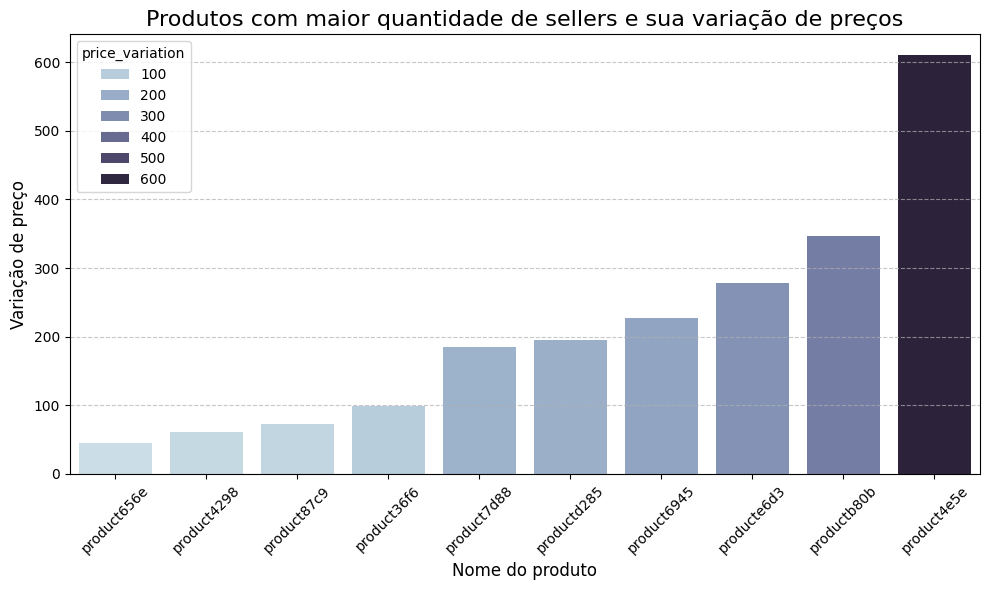

In [2074]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_10_sellers_sharing_products, x='product_name', y='price_variation', hue='price_variation', palette="ch:s=.25,rot=-.25")

plt.title('Produtos com maior quantidade de sellers e sua variação de preços', fontsize=16)
plt.xlabel('Nome do produto', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Variação de preço', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

In [2075]:
top_5_sellers_sharing_products = sellers_same_products.sort_values(by='sellers_count', ascending=False).head(5)

**Desempacotando a coluna de preços, para que cada valor tenha sua prórpia linha**

In [2076]:
top_5_sellers_sharing_products_expanded = top_5_sellers_sharing_products.explode('prices')
top_5_sellers_sharing_products_expanded

,product_name,seller_name,prices,min_price,max_price,price_variation,sellers_count
10158,product656e,"[sellerc70c, seller00fc, seller6973, seller8e6...",65.9,65.0,110.32,45.32,8
10158,product656e,"[sellerc70c, seller00fc, seller6973, seller8e6...",65.0,65.0,110.32,45.32,8
10158,product656e,"[sellerc70c, seller00fc, seller6973, seller8e6...",72.99,65.0,110.32,45.32,8
10158,product656e,"[sellerc70c, seller00fc, seller6973, seller8e6...",73.0,65.0,110.32,45.32,8
10158,product656e,"[sellerc70c, seller00fc, seller6973, seller8e6...",79.9,65.0,110.32,45.32,8
...,...,...,...,...,...,...,...
5552,product36f6,"[seller8846, seller00fc, seller6973, seller8e6...",78.9,67.9,167.00,99.10,7
5552,product36f6,"[seller8846, seller00fc, seller6973, seller8e6...",86.0,67.9,167.00,99.10,7
5552,product36f6,"[seller8846, seller00fc, seller6973, seller8e6...",87.0,67.9,167.00,99.10,7
5552,product36f6,"[seller8846, seller00fc, seller6973, seller8e6...",88.0,67.9,167.00,99.10,7


### Visualização através do Boxplot

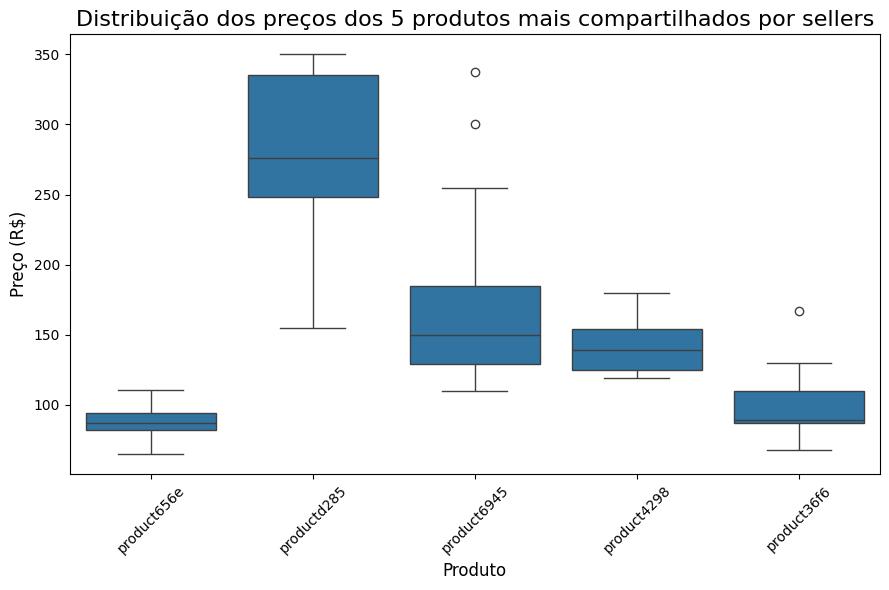

In [2077]:
plt.figure(figsize=(9, 6))
sns.boxplot(data=top_5_sellers_sharing_products_expanded, x='product_name', y='prices')
plt.title('Distribuição dos preços dos 5 produtos mais compartilhados por sellers', fontsize=16)
plt.xlabel('Produto', fontsize=12)
plt.ylabel('Preço (R$)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 melhores sellers (com mais reviews positivas)

In [2078]:
sellers_df_names = sellers_df_cleaned
sellers_df_names['seller_name'] = 'seller' + sellers_df_names['seller_id'].str[:4]

In [2079]:
sellers_df_names.head()

,seller_id,seller_name
0,3442f8959a84dea7ee197c632cb2df15,seller3442
1,d1b65fc7debc3361ea86b5f14c68d2e2,sellerd1b6
2,ce3ad9de960102d0677a81f5d0bb7b2d,sellerce3a
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sellerc0f3
4,51a04a8a6bdcb23deccc82b0b80742cf,seller51a0


In [2080]:
order_items_df_cleaned.head()

,order_id,order_item_id,product_id,seller_id
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87


- Merge de sellers e order_items

In [2081]:
merge_df4 = pd.merge(sellers_df_names, order_items_df_cleaned, on='seller_id', how='inner')
merge_df4.head()

,seller_id,seller_name,order_id,order_item_id,product_id
0,3442f8959a84dea7ee197c632cb2df15,seller3442,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61
1,3442f8959a84dea7ee197c632cb2df15,seller3442,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d
2,3442f8959a84dea7ee197c632cb2df15,seller3442,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4
3,d1b65fc7debc3361ea86b5f14c68d2e2,sellerd1b6,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff
4,d1b65fc7debc3361ea86b5f14c68d2e2,sellerd1b6,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f


- Merge com orders

In [2082]:
merge_df4 = pd.merge(merge_df4, orders_df_cleaned2, on='order_id', how='inner')
merge_df4.head()

,seller_id,seller_name,order_id,order_item_id,product_id
0,3442f8959a84dea7ee197c632cb2df15,seller3442,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4
1,d1b65fc7debc3361ea86b5f14c68d2e2,sellerd1b6,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff
2,d1b65fc7debc3361ea86b5f14c68d2e2,sellerd1b6,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f
3,d1b65fc7debc3361ea86b5f14c68d2e2,sellerd1b6,16fd9b360cbadca08b1026c8532820f5,1,f74ed500ab93d12ce3fbc611474d89af
4,d1b65fc7debc3361ea86b5f14c68d2e2,sellerd1b6,21fab12baaa93481ad76d02fa22255eb,1,4353af36fe588dc73497fa158ed6cefb


- Merge com reviews (obterei apenas os produtos que possuem reviews, pois se um produto não tem review, ele não vai contribuir para a análise)

In [2083]:
merge_df4 = pd.merge(merge_df4, order_reviews_df_cleaned, on='order_id', how='inner')
merge_df4.head()

,seller_id,seller_name,order_id,order_item_id,product_id,review_id,review_score,review_comment_title,review_comment_message
0,3442f8959a84dea7ee197c632cb2df15,seller3442,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,cc77a6d63753c1d7b88b7c64630b97b9,3,Nenhum título,coprei tres ítens faltou entregar um
1,d1b65fc7debc3361ea86b5f14c68d2e2,sellerd1b6,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,27a894ac7d70600fd49d2ac3b910e65d,5,Nenhum título,A cor é muito diferente da foto.\r\nÉ uma ótim...
2,d1b65fc7debc3361ea86b5f14c68d2e2,sellerd1b6,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,265e6d99461ed7db35a7f48a00df7e6c,5,Nenhum título,excelente aquisição
3,d1b65fc7debc3361ea86b5f14c68d2e2,sellerd1b6,16fd9b360cbadca08b1026c8532820f5,1,f74ed500ab93d12ce3fbc611474d89af,90d1148c6f19ba228dfcfb87bdda1bca,5,Nenhum título,"Produto idêntico a da foto, e entrega rápida. ..."
4,d1b65fc7debc3361ea86b5f14c68d2e2,sellerd1b6,21fab12baaa93481ad76d02fa22255eb,1,4353af36fe588dc73497fa158ed6cefb,01be0a30ff6e06bfde5e1acc5c5f4a7d,5,Nenhum título,O produto é ótimo e a entrega foi antes do pre...


### Valores Faltantes

In [2084]:
merge_df4.isnull().sum()

seller_id                 0
seller_name               0
order_id                  0
order_item_id             0
product_id                0
review_id                 0
review_score              0
review_comment_title      0
review_comment_message    0
dtype: int64

### Duplicatas

In [2085]:
merge_df4.duplicated().sum()

np.int64(0)

In [2086]:
merge_df4.shape

(85223, 9)

In [2087]:
merge_df4.head(15)

,seller_id,seller_name,order_id,order_item_id,product_id,review_id,review_score,review_comment_title,review_comment_message
0,3442f8959a84dea7ee197c632cb2df15,seller3442,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,cc77a6d63753c1d7b88b7c64630b97b9,3,Nenhum título,coprei tres ítens faltou entregar um
1,d1b65fc7debc3361ea86b5f14c68d2e2,sellerd1b6,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,27a894ac7d70600fd49d2ac3b910e65d,5,Nenhum título,A cor é muito diferente da foto.\r\nÉ uma ótim...
2,d1b65fc7debc3361ea86b5f14c68d2e2,sellerd1b6,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,265e6d99461ed7db35a7f48a00df7e6c,5,Nenhum título,excelente aquisição
3,d1b65fc7debc3361ea86b5f14c68d2e2,sellerd1b6,16fd9b360cbadca08b1026c8532820f5,1,f74ed500ab93d12ce3fbc611474d89af,90d1148c6f19ba228dfcfb87bdda1bca,5,Nenhum título,"Produto idêntico a da foto, e entrega rápida. ..."
4,d1b65fc7debc3361ea86b5f14c68d2e2,sellerd1b6,21fab12baaa93481ad76d02fa22255eb,1,4353af36fe588dc73497fa158ed6cefb,01be0a30ff6e06bfde5e1acc5c5f4a7d,5,Nenhum título,O produto é ótimo e a entrega foi antes do pre...
5,d1b65fc7debc3361ea86b5f14c68d2e2,sellerd1b6,2d5abff139e8101029312b689bfeae7a,1,f74ed500ab93d12ce3fbc611474d89af,35c7b1789db330dfda75511bfe965525,4,Nenhum título,Nenhuma mensagem
6,d1b65fc7debc3361ea86b5f14c68d2e2,sellerd1b6,3ad057222aa3896524e1f8676a6fed66,1,16afd9cf37e1b340bc46822fdd8240aa,08cddc0ee7ce3a240cd466f672038d09,4,Nenhum título,Nenhuma mensagem
7,d1b65fc7debc3361ea86b5f14c68d2e2,sellerd1b6,4b3be677878505d6696458ae4b209876,1,f74ed500ab93d12ce3fbc611474d89af,52b2a058d09c97ef05d0f455a84e9c04,5,Nenhum título,Nenhuma mensagem
8,d1b65fc7debc3361ea86b5f14c68d2e2,sellerd1b6,56cbeec7ba721c09cf45937ec625f675,1,aa720f8684a8fc318f7a22c52c02a2dc,7b57bd31862f46b892533b8a5200cb16,5,Nenhum título,"entrega super rápida, produto conforme anunciado."
9,d1b65fc7debc3361ea86b5f14c68d2e2,sellerd1b6,68350de28c940e619bfce38aa0001ef2,1,ba1cc0f3f26616d7ad90de1085bdfeda,596ce38da99fd281dd79ae7d18f8cdb0,4,Nenhum título,Nenhuma mensagem


In [2088]:
merge_df4.seller_name.value_counts()

seller_name
seller1f50    1682
seller6560    1604
seller955f    1433
seller1025    1378
seller4a3c    1350
              ... 
seller8e67       1
sellerbede       1
sellerec21       1
seller13d9       1
seller9853       1
Name: count, Length: 2550, dtype: int64

**Para a minha análise, eu resolvi filtrar os sellers com um número mínimo de Reviews**

Isso para que sellers com poucos reviews não enviesem a base. Portanto, a **média bayesiana** vai ser utilizada, pois ela garante que à medida que o número de avaliações aumente, o peso das avaliações individuais cresce.

media_bayesiana = (valor_minimo_reviews * nota_media_geral) + soma_notas_seller / valor_minimo_reviews + numero_avaliacoes_sellers
                    
Eu estabeleci que valor mínimo de reviews para a análise será de **25**

In [2089]:
merge_df4.head()

,seller_id,seller_name,order_id,order_item_id,product_id,review_id,review_score,review_comment_title,review_comment_message
0,3442f8959a84dea7ee197c632cb2df15,seller3442,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,cc77a6d63753c1d7b88b7c64630b97b9,3,Nenhum título,coprei tres ítens faltou entregar um
1,d1b65fc7debc3361ea86b5f14c68d2e2,sellerd1b6,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,27a894ac7d70600fd49d2ac3b910e65d,5,Nenhum título,A cor é muito diferente da foto.\r\nÉ uma ótim...
2,d1b65fc7debc3361ea86b5f14c68d2e2,sellerd1b6,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,265e6d99461ed7db35a7f48a00df7e6c,5,Nenhum título,excelente aquisição
3,d1b65fc7debc3361ea86b5f14c68d2e2,sellerd1b6,16fd9b360cbadca08b1026c8532820f5,1,f74ed500ab93d12ce3fbc611474d89af,90d1148c6f19ba228dfcfb87bdda1bca,5,Nenhum título,"Produto idêntico a da foto, e entrega rápida. ..."
4,d1b65fc7debc3361ea86b5f14c68d2e2,sellerd1b6,21fab12baaa93481ad76d02fa22255eb,1,4353af36fe588dc73497fa158ed6cefb,01be0a30ff6e06bfde5e1acc5c5f4a7d,5,Nenhum título,O produto é ótimo e a entrega foi antes do pre...


In [2090]:
merge_df4.shape

(85223, 9)

**Calculando a média geral de todas as reviews**

In [2091]:
general_mean = merge_df4['review_score'].mean()
general_mean

np.float64(4.051429778346221)

**Valor mínimo de reviews**

In [2092]:
min_review_value = 25

**Obtendo o total dos reviews score por seller e a contagem de reviews com agrupamento**

In [2093]:
reviews_score_per_seller = merge_df4.groupby('seller_name').agg(
    review_count = ('review_score', 'count'),
    review_score_total = ('review_score', 'sum')
).reset_index()

In [2094]:
reviews_score_per_seller.head()

,seller_name,review_count,review_score_total
0,seller0015,3,11
1,seller001c,106,421
2,seller0021,55,222
3,seller0035,1,5
4,seller004c,77,309


**Calculando a média bayesiana**

media_bayesiana = (valor_minimo_reviews * nota_media_geral) + soma_notas_seller / (valor_minimo_reviews + numero_avaliacoes_sellers)

In [2095]:
reviews_score_per_seller['bayesian_avg'] = (((min_review_value*general_mean) + reviews_score_per_seller['review_score_total']) / (min_review_value + reviews_score_per_seller['review_count'])).round(2)

In [2096]:
reviews_score_per_seller

,seller_name,review_count,review_score_total,bayesian_avg
0,seller0015,3,11,4.01
1,seller001c,106,421,3.99
2,seller0021,55,222,4.04
3,seller0035,1,5,4.09
4,seller004c,77,309,4.02
...,...,...,...,...
2545,sellerffad,15,73,4.36
2546,sellerffc4,30,129,4.19
2547,sellerffdd,17,72,4.13
2548,sellerffee,14,59,4.11


**Ordenando pela média bayesiana**

In [2097]:
reviews_score_per_seller = reviews_score_per_seller.sort_values(by='bayesian_avg', ascending = False)

In [2098]:
reviews_score_per_seller.reset_index(drop=True)

,seller_name,review_count,review_score_total,bayesian_avg
0,sellerd13e,68,327,4.61
1,sellerd9bd,61,294,4.60
2,sellerd566,71,335,4.54
3,sellerb410,42,202,4.53
4,seller334c,26,129,4.52
...,...,...,...,...
2545,seller8e6d,132,400,3.19
2546,sellera499,84,230,3.04
2547,sellerb37c,14,16,3.01
2548,seller2eb7,195,547,2.95


### Exibindo em gráficos

In [2099]:
top10_best_sellers = reviews_score_per_seller.head(10)

In [2100]:
top10_worst_sellers = reviews_score_per_seller.tail(10)

**Teste de normalidade Shapiro Wilk**

Se p-value > 0,05

Ho = segue uma distribuição normal

Se p-value < 0,05

Ha = não segue uma distribuição normal

In [2101]:
import scipy.stats as stats

In [2102]:
stat, p_value = stats.shapiro(top10_best_sellers['bayesian_avg'])
print(f'stat: {stat}')
print(f'p-value: {p_value}')

stat: 0.8078805977143213
p-value: 0.01807271495089263


**Top 10 maiores sellers não segue distribuição normal**

In [2103]:
stat, p_value = stats.shapiro(top10_worst_sellers['bayesian_avg'])
print(f'stat: {stat}')
print(f'p-value: {p_value}')

stat: 0.7778379074030253
p-value: 0.0077915997537407675


**Top 10 piores sellers não segue distribuição normal**

### Visualização através do gráfico de linhas

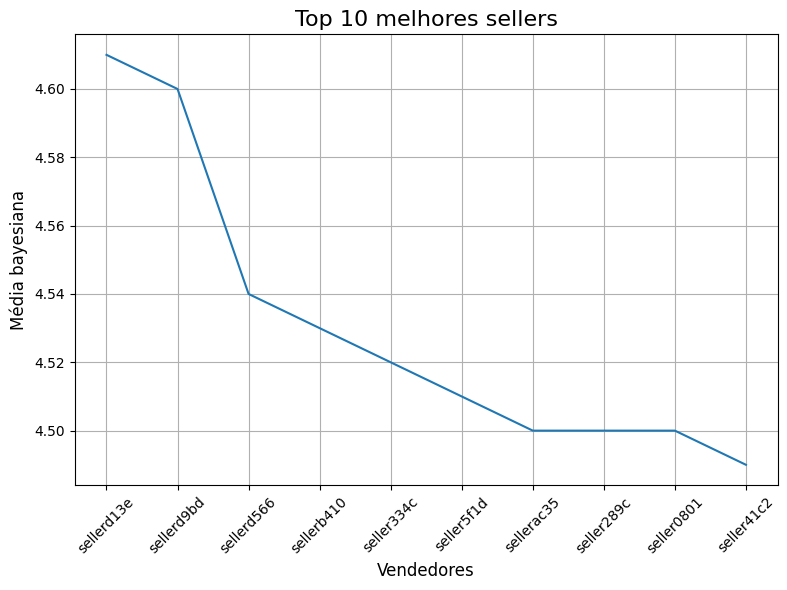

In [2104]:
plt.figure(figsize=(8,6))
sns.lineplot(x='seller_name', y='bayesian_avg', data=top10_best_sellers)
plt.title('Top 10 melhores sellers', fontsize=16)
plt.ylabel('Média bayesiana', fontsize=12)
plt.xlabel('Vendedores', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Top 10 piores sellers(com mais reviews negativas)

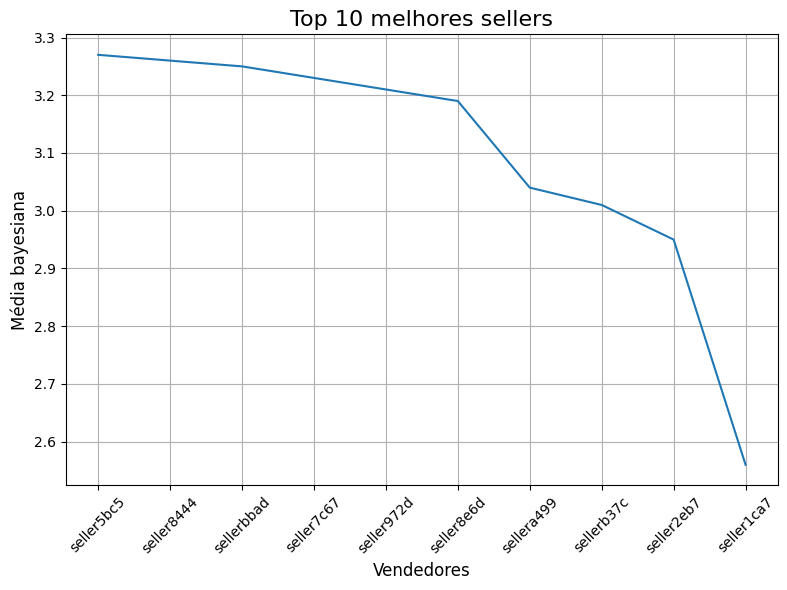

In [2105]:
plt.figure(figsize=(8,6))
sns.lineplot(x='seller_name', y='bayesian_avg', data=top10_worst_sellers)
plt.title('Top 10 melhores sellers', fontsize=16)
plt.ylabel('Média bayesiana', fontsize=12)
plt.xlabel('Vendedores', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Existe relação entre a quantidade de vendas e a quantidade de reviews para os sellers? É possível identificar aumento ou queda na venda de um seller com base nas avaliações do que já foi vendido no passado?

## Existe relação entre a quantidade de vendas e a quantidade de reviews para os sellers?

Para verificar a relação entre a quantidade de vendas e a quantidade de reviews, resolvi utilizar a **correlação linear** que é representada pelo **Coeficiente de correlação de Pearson(r)**.

Este coeficiente varia de -1 e +1.

Se **r > 0**, à medida que a quantidade de vendas aumenta, a quantidade de reviews também aumenta.<br>
Se **r < 0**, à medida que a quantidade de vendas aumenta, a quantidade de reviews tende a diminuir. <br>
Se **r = 0**, não há relação linear entre as variáveis.

### Merges

- Sellers e Order Items

In [2106]:
merge_df5 = pd.merge(sellers_df_names, order_items_df_cleaned, on='seller_id', how='inner')
merge_df5.head()

,seller_id,seller_name,order_id,order_item_id,product_id
0,3442f8959a84dea7ee197c632cb2df15,seller3442,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61
1,3442f8959a84dea7ee197c632cb2df15,seller3442,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d
2,3442f8959a84dea7ee197c632cb2df15,seller3442,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4
3,d1b65fc7debc3361ea86b5f14c68d2e2,sellerd1b6,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff
4,d1b65fc7debc3361ea86b5f14c68d2e2,sellerd1b6,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f


- Merge com orders

In [2107]:
merge_df5 = pd.merge(merge_df5, orders_df_cleaned2, on='order_id', how='inner')
merge_df5.head()

,seller_id,seller_name,order_id,order_item_id,product_id
0,3442f8959a84dea7ee197c632cb2df15,seller3442,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4
1,d1b65fc7debc3361ea86b5f14c68d2e2,sellerd1b6,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff
2,d1b65fc7debc3361ea86b5f14c68d2e2,sellerd1b6,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f
3,d1b65fc7debc3361ea86b5f14c68d2e2,sellerd1b6,16fd9b360cbadca08b1026c8532820f5,1,f74ed500ab93d12ce3fbc611474d89af
4,d1b65fc7debc3361ea86b5f14c68d2e2,sellerd1b6,21fab12baaa93481ad76d02fa22255eb,1,4353af36fe588dc73497fa158ed6cefb


- Left merge com reviews para manter todos os produtos vendidos e não só os que possuem reviews

In [2108]:
merge_df5 = pd.merge(merge_df5, order_reviews_df_cleaned, on='order_id', how='left')
merge_df5.head()

,seller_id,seller_name,order_id,order_item_id,product_id,review_id,review_score,review_comment_title,review_comment_message
0,3442f8959a84dea7ee197c632cb2df15,seller3442,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,cc77a6d63753c1d7b88b7c64630b97b9,3.0,Nenhum título,coprei tres ítens faltou entregar um
1,d1b65fc7debc3361ea86b5f14c68d2e2,sellerd1b6,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,27a894ac7d70600fd49d2ac3b910e65d,5.0,Nenhum título,A cor é muito diferente da foto.\r\nÉ uma ótim...
2,d1b65fc7debc3361ea86b5f14c68d2e2,sellerd1b6,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,265e6d99461ed7db35a7f48a00df7e6c,5.0,Nenhum título,excelente aquisição
3,d1b65fc7debc3361ea86b5f14c68d2e2,sellerd1b6,16fd9b360cbadca08b1026c8532820f5,1,f74ed500ab93d12ce3fbc611474d89af,90d1148c6f19ba228dfcfb87bdda1bca,5.0,Nenhum título,"Produto idêntico a da foto, e entrega rápida. ..."
4,d1b65fc7debc3361ea86b5f14c68d2e2,sellerd1b6,21fab12baaa93481ad76d02fa22255eb,1,4353af36fe588dc73497fa158ed6cefb,01be0a30ff6e06bfde5e1acc5c5f4a7d,5.0,Nenhum título,O produto é ótimo e a entrega foi antes do pre...


In [2109]:
merge_df5.shape

(85841, 9)

### Valores nulos

In [2110]:
merge_df5.isnull().sum()

seller_id                   0
seller_name                 0
order_id                    0
order_item_id               0
product_id                  0
review_id                 618
review_score              618
review_comment_title      618
review_comment_message    618
dtype: int64

### Duplicatas

In [2111]:
merge_df5.duplicated().sum()

np.int64(0)

### Agregação para obter a quantidade de produtos vendidos e a quantidade de reviews realizadas

In [2112]:
correlation_sellers_reviews = merge_df5.groupby('seller_name').agg(
    qnty_products_sold = ('seller_name', 'count'),
    count_reviews = ('review_score', lambda x : x.notna().sum())
).reset_index()

In [2113]:
correlation_sellers_reviews.head()

,seller_name,qnty_products_sold,count_reviews
0,seller0015,3,3
1,seller001c,107,106
2,seller0021,55,55
3,seller0035,1,1
4,seller004c,79,77


Criando uma coluna para evidenciar a difereça entre produtos vendidos e reviews realizadas

In [2114]:
correlation_sellers_reviews['qnty_products_without_reviews'] = (
    correlation_sellers_reviews['qnty_products_sold'] - correlation_sellers_reviews['count_reviews']
)

Abaixo é possível observar que **poucos clientes não deixam reviews sobre o produto**

In [2115]:
correlation_sellers_reviews = correlation_sellers_reviews.sort_values(by='qnty_products_without_reviews', ascending=False).reset_index(drop=True)
correlation_sellers_reviews

,seller_name,qnty_products_sold,count_reviews,qnty_products_without_reviews
0,seller6560,1617,1604,13
1,seller1025,1390,1378,12
2,seller620c,550,539,11
3,seller955f,1443,1433,10
4,seller4a3c,1359,1350,9
...,...,...,...,...
2547,seller578f,3,3,0
2548,seller5795,6,6,0
2549,seller5798,6,6,0
2550,seller57a8,1,1,0


### Analisando a correlação através de um scatter plot

A correlação é positiva e muito forte. Isso significa que **quanto mais produtos vendidos, maior tende a ser a quantidade de reviews recebidas.**

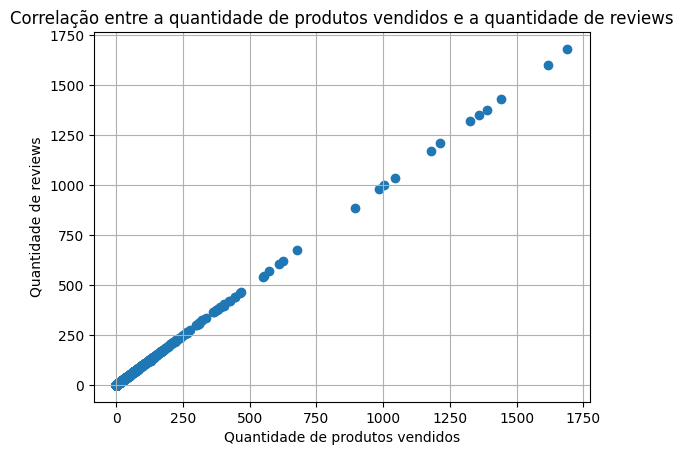

In [2116]:
plt.scatter(correlation_sellers_reviews.qnty_products_sold, correlation_sellers_reviews.count_reviews)
plt.title('Correlação entre a quantidade de produtos vendidos e a quantidade de reviews')
plt.xlabel('Quantidade de produtos vendidos')
plt.ylabel('Quantidade de reviews')
plt.grid(True)
plt.show()

In [2117]:
correlation = correlation_sellers_reviews['qnty_products_sold'].corr(correlation_sellers_reviews['count_reviews'], method='pearson')

In [2118]:
print(f"Correlação entre quantidade de produtos vendidos e reviews: {correlation}")

Correlação entre quantidade de produtos vendidos e reviews: 0.999982253445691


## É possível identificar aumento ou queda na venda de um seller com base nas avaliações do que já foi vendido no passado?

A minha ideia é filtrar o dataset de orders novamente, porém considerando a **data mínima anterior(min_order_date) utilizada para filtrar os últimos 12 meses, como data máxima**. Dessa forma, eu subtraio 12 meses e terei os **dados do passado**.

### Carregando o dataset novamente para evitar conflitos

In [2119]:
orders_dataset2 = pd.read_csv('/home/matsa/Documents/project_sprint02/data/olist_orders_dataset.csv')

In [2120]:
orders_dataset2.dropna(axis=0, inplace=True)

In [2121]:
orders_dataset2['order_approved_at'] = pd.to_datetime(orders_dataset2.order_approved_at)

In [2122]:
max_order_date2 = min_order_date
max_order_date2

Timestamp('2017-08-29 15:10:26')

In [2123]:
min_order_date2 = max_order_date2 - pd.DateOffset(months=12)
min_order_date2

Timestamp('2016-08-29 15:10:26')

### Pegando as datas nos intervalos definidos

In [2124]:
past_orders_df_data = orders_dataset2.loc[(orders_dataset2.order_approved_at >= min_order_date2) &
                                    (orders_dataset2.order_approved_at <= max_order_date2)]

In [2125]:
past_orders_df_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00
10,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07 00:00:00
...,...,...,...,...,...,...,...,...
99426,7cc85185736ea7f2d8bc09af7a47cab7,9e870ea67399650e8c3545a25d13e4d0,delivered,2017-05-15 09:46:26,2017-05-15 10:02:45,2017-05-15 14:11:06,2017-05-22 18:05:56,2017-06-07 00:00:00
99434,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,delivered,2017-01-27 00:30:03,2017-01-27 01:05:25,2017-01-30 11:40:16,2017-02-07 13:15:25,2017-03-17 00:00:00
99435,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22 00:00:00
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00


**Data mínima**

In [2126]:
past_orders_df_data.order_approved_at.min()

Timestamp('2016-09-15 12:16:38')

**Data máxima**

In [2127]:
past_orders_df_data.order_approved_at.max()

Timestamp('2017-08-29 14:50:16')

### Excluindo colunas

In [2128]:
columns_drop = orders_dataset.columns[[3,5,6,7]]

In [2129]:
past_orders_df_data = past_orders_df_data.drop(columns=columns_drop, axis=1)

### Merges

- Seller e Order Items

In [2130]:
merge_df6 = pd.merge(sellers_df_cleaned, order_items_df_cleaned, on='seller_id', how='inner')

- Orders

In [2131]:
merge_df6 = pd.merge(merge_df6, past_orders_df_data, on='order_id', how='inner')

- Reviews

In [2132]:
merge_df6 = pd.merge(merge_df6, order_reviews_df_cleaned, on='order_id', how='left')

In [2133]:
merge_df6.head()

,seller_id,seller_name,order_id,order_item_id,product_id,customer_id,order_status,order_approved_at,review_id,review_score,review_comment_title,review_comment_message
0,3442f8959a84dea7ee197c632cb2df15,seller3442,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,9d6837f9700a3441e7183bff3bc4eef0,delivered,2017-08-21 20:50:19,88980a9c50a6909fa1fe35ddab8fa1e2,5.0,Nenhum título,Nenhuma mensagem
1,3442f8959a84dea7ee197c632cb2df15,seller3442,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,a973c4e3ad82777add3fa188f91dacea,delivered,2017-05-05 16:25:11,b9b791819c5c1a5c6a4ffc7881f97fb5,1.0,Nenhum título,"O pedido foi realizado no dia 5/5/2017, e até ..."
2,d1b65fc7debc3361ea86b5f14c68d2e2,sellerd1b6,06e4e324b83309e575442446e34377d7,1,1c36a5285f7f3b1ed2637d7c528ce5ff,28635c64d8f2aee6e47124350f7ffb38,delivered,2017-06-23 02:25:24,b793725422d848517417f2e9ac1d4eb9,5.0,Nenhum título,Nenhuma mensagem
3,d1b65fc7debc3361ea86b5f14c68d2e2,sellerd1b6,1887b26eba419ce20f6fe34a6f88e80a,1,765c417cdc38443aaa558a0159a98591,23fe51c9d4d1b1cef50c57b3c0babf5e,delivered,2017-04-28 14:35:15,9de1a1b5a62567638d90dcaa1ef7c90f,5.0,Nenhum título,Nenhuma mensagem
4,d1b65fc7debc3361ea86b5f14c68d2e2,sellerd1b6,42f364e1317053c36378cc534b19ab6e,1,5073cb7b965df5f1fea32e8728782a8f,93a991179d5b741e60819f8adc163df3,delivered,2017-06-29 00:23:32,d53d6d8819cf34d405434432c234a0b4,4.0,Nenhum título,Material de boa qualidade e bonito..Só achei q...


### Agregação para obter a quantidade de produtos vendidos e a quantidade de reviews realizadas

In [2134]:
correlation_sellers_reviews_past = merge_df6.groupby('seller_name').agg(
    qnty_products_sold = ('seller_name', 'count'),
    count_reviews = ('review_score', lambda x : x.notna().sum())
).reset_index()

Criando a coluna de quantidade de produtos sem reviews

In [2135]:
correlation_sellers_reviews_past['qnty_products_without_reviews'] = (
    correlation_sellers_reviews_past['qnty_products_sold'] - correlation_sellers_reviews_past['count_reviews']
)

In [2136]:
correlation_sellers_reviews_past = correlation_sellers_reviews_past.sort_values(by='qnty_products_without_reviews', ascending=False).reset_index(drop=True)
correlation_sellers_reviews_past

,seller_name,qnty_products_sold,count_reviews,qnty_products_without_reviews
0,sellerce27,108,84,24
1,seller4a3c,686,673,13
2,sellercca3,521,512,9
3,sellerc42f,11,6,5
4,sellerd237,255,250,5
...,...,...,...,...
1150,sellerfe4c,2,2,0
1151,sellerfe1b,10,10,0
1152,sellerfe19,1,1,0
1153,sellerfdb9,31,31,0


### Merge dos dataframes dos dois intervalos de tempo utilizados

In [2137]:
dates_interval_comparasion = pd.merge(correlation_sellers_reviews_past, correlation_sellers_reviews, on='seller_name', how='inner', suffixes=('_past', '_current'))

In [2138]:
dates_interval_comparasion.head()

,seller_name,qnty_products_sold_past,count_reviews_past,qnty_products_without_reviews_past,qnty_products_sold_current,count_reviews_current,qnty_products_without_reviews_current
0,sellerce27,108,84,24,43,43,0
1,seller4a3c,686,673,13,1359,1350,9
2,sellercca3,521,512,9,312,304,8
3,sellerd237,255,250,5,391,389,2
4,sellera673,32,28,4,112,110,2


### Ordenação da quantidade de produtos vendidos dos intervalos de tempo para cada seller

In [2139]:
dates_interval_comparasion = dates_interval_comparasion.sort_values(by=['qnty_products_sold_past', 'qnty_products_sold_current'], ascending=False).reset_index(drop=True)

In [2140]:
dates_interval_comparasion

,seller_name,qnty_products_sold_past,count_reviews_past,qnty_products_without_reviews_past,qnty_products_sold_current,count_reviews_current,qnty_products_without_reviews_current
0,seller4a3c,686,673,13,1359,1350,9
1,sellercc41,547,545,2,1212,1210,2
2,seller7a67,545,542,3,611,606,5
3,sellercca3,521,512,9,312,304,8
4,seller6560,385,381,4,1617,1604,13
...,...,...,...,...,...,...,...
820,sellerc161,1,1,0,1,1,0
821,sellerc76d,1,1,0,1,1,0
822,sellerdd8a,1,1,0,1,1,0
823,sellerf119,1,1,0,1,1,0


### Visualização através do gráfico de barras

Comparação da quantidade de produtos vendidos nos intervalos de tempos dos **vendedores que mais vendem**

In [2141]:
top10_sellers = dates_interval_comparasion.head(10)

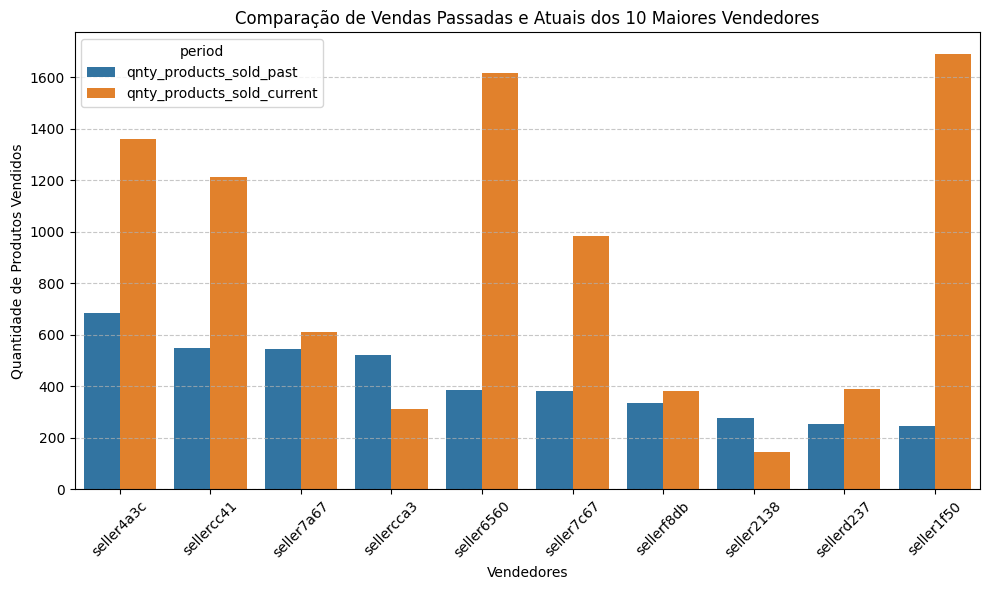

In [2142]:
top10_sellers_long = pd.melt(top10_sellers, 
                            id_vars=['seller_name'], 
                            value_vars=['qnty_products_sold_past', 'qnty_products_sold_current'],
                            var_name='period', 
                            value_name='quantity_sold')

plt.figure(figsize=(10, 6))
sns.barplot(x='seller_name', y='quantity_sold', hue='period', data=top10_sellers_long)

plt.title('Comparação de Vendas Passadas e Atuais dos 10 Maiores Vendedores')
plt.xlabel('Vendedores')
plt.ylabel('Quantidade de Produtos Vendidos')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

# Houve inflação no preço dos produtos ao passar do tempo? Se houve, de quanto foi a variação desta inflação em % e em R$?

In [2143]:
order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [2144]:
# Excluindo colunas do Order Items não necessárias para a análise
columns_drop = order_items_dataset.columns[[3,4]]
order_items_df_cleaned2 = order_items_dataset.drop(columns=columns_drop, axis=1)
order_items_df_cleaned2.head()

,order_id,order_item_id,product_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14


In [2145]:
products_df_cleaned.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


### Tratamento dos dataframes orders que serão utilizados

Primeiro intervalo de tempo de orders 2017-2018

In [2146]:
orders_df_cleaned.columns 

Index(['order_id', 'customer_id', 'order_status', 'order_approved_at'], dtype='object')

In [2147]:
# Excluindo colunas não necessárias para análise
columns_drop = orders_df_cleaned.columns[[1,2]]
current_orders_df_cleaned = orders_df_cleaned.drop(columns=columns_drop, axis=1)

In [2148]:
current_orders_df_cleaned.head()

,order_id,order_approved_at
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 11:07:15
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-26 03:24:27
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:55:23
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:45:59
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 22:20:29


Primeiro intervalo de tempo de orders 2016-2017

In [2149]:
past_orders_df_data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_approved_at'], dtype='object')

In [2150]:
# Excluindo colunas não necessárias para análise
columns_drop = past_orders_df_data.columns[[1,2]]
past_orders_df_cleaned = past_orders_df_data.drop(columns=columns_drop, axis=1)

In [2151]:
past_orders_df_cleaned.head()

,order_id,order_approved_at
5,a4591c265e18cb1dcee52889e2d8acc3,2017-07-09 22:10:13
7,6514b8ad8028c9f2cc2374ded245783f,2017-05-16 13:22:11
8,76c6e866289321a7c93b82b54852dc33,2017-01-25 02:50:47
9,e69bfb5eb88e0ed6a785585b27e16dbf,2017-07-29 12:05:32
10,e6ce16cb79ec1d90b1da9085a6118aeb,2017-05-16 19:50:18


### Merges



#### Dataframe intervalo 2017-2018

- Products com Order Items

In [2152]:
merge_df7 = pd.merge(products_df_cleaned, order_items_df_cleaned2, on='product_id', how='inner')

- Orders

In [2153]:
merge_df7 = pd.merge(merge_df7, current_orders_df_cleaned, on='order_id', how='inner')

In [2154]:
merge_df7.head()

,product_id,product_category_name,order_id,order_item_id,price,freight_value,order_approved_at
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce,1,10.91,7.39,2018-04-24 19:04:19
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,5236307716393b7114b53ee991f36956,1,248.00,17.99,2018-01-31 19:11:15
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,01f66e58769f84129811d43eefd187fb,1,79.80,7.82,2018-07-09 21:30:20
3,cef67bcfe19066a932b7673e239eb23d,bebes,143d00a4f2dde4e0364ee1821577adb3,1,112.30,9.54,2018-08-03 09:31:42
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,86cafb8794cb99a9b1b77fc8e48fbbbb,1,37.90,8.29,2018-04-11 01:30:23


In [2155]:
merge_df7.shape

(84358, 7)

In [2156]:
merge_df7.duplicated().sum()

np.int64(0)

### Dataframe intervalo 2016-2017

- Products Order Items

In [2157]:
merge_df8 = pd.merge(products_df_cleaned, order_items_df_cleaned2, on='product_id', how='inner')

- Orders

In [2158]:
merge_df8 = pd.merge(merge_df8, past_orders_df_cleaned, on='order_id', how='inner')

In [2159]:
merge_df8.head()

,product_id,product_category_name,order_id,order_item_id,price,freight_value,order_approved_at
0,37cc742be07708b53a98702e77a21a02,eletrodomesticos,1f11f0ab2b0ec59d0ec45f7f810a04f8,1,10.4,16.79,2017-06-15 07:10:06
1,7bb6f29c2be57716194f96496660c7c2,moveis_decoracao,4c4590c53b8582812e4bf510d3e55e58,1,59.9,17.70,2017-07-16 23:03:39
2,3bb7f144022e6732727d8d838a7b13b3,esporte_lazer,7f6209da874fb56bf2fd26791d83bcb8,1,26.7,11.85,2017-06-04 20:10:13
3,a1b71017a84f92fd8da4aeefba108a24,informatica_acessorios,bee9e2345c4d8f186d2aa7d57e1589f3,1,69.9,19.73,2017-05-24 18:35:17
4,1c1890ba1779090cd54008a3c3302921,moveis_decoracao,300ddfe520bd71c223ba642400982151,1,111.9,16.54,2017-06-04 21:10:14


In [2160]:
merge_df8.shape

(24286, 7)

In [2161]:
merge_df8.product_id.duplicated().sum()

np.int64(14955)

In [2162]:
merge_df8.duplicated().sum()

np.int64(0)

In [2163]:
merge_df8.columns

Index(['product_id', 'product_category_name', 'order_id', 'order_item_id',
       'price', 'freight_value', 'order_approved_at'],
      dtype='object')

### Agrupamentos

#### Estrutura de raciocínio

Como eu possuo 2 dataframes com intervalos de tempos diferentes, a ideia é unir eles pelo **product_id** para que os mesmos produtos possam ser comparados, em épocas diferentes.

Resolvi utilizar a **média de preços de um mesmo produto** para visualizar a variação da inflação.

Calculando a média de preços por produto no intervalo 2017-2018

In [2164]:
mean_price_2017_2018 = merge_df7.groupby(['product_id', 'product_category_name']).agg(
    mean_product_value_current = ('price', 'mean')
).reset_index()

In [2165]:
mean_price_2017_2018.head()

,product_id,product_category_name,mean_product_value_current
0,00066f42aeeb9f3007548bb9d3f33c38,perfumaria,101.65
1,00088930e925c41fd95ebfe695fd2655,automotivo,129.90
2,0009406fd7479715e4bef61dd91f2462,cama_mesa_banho,229.00
3,000b8f95fcb9e0096488278317764d19,utilidades_domesticas,58.90
4,000d9be29b5207b54e86aa1b1ac54872,relogios_presentes,199.00


Calculando a média de preços por produto no intervalo 2016-2017

In [2166]:
mean_price_2016_2017 = merge_df8.groupby(['product_id', 'product_category_name']).agg(
    mean_product_value_past = ('price', 'mean')
).reset_index()

In [2167]:
mean_price_2016_2017.head()

,product_id,product_category_name,mean_product_value_past
0,001b72dfd63e9833e8c02742adf472e3,moveis_decoracao,34.990000
1,001c5d71ac6ad696d22315953758fa04,cama_mesa_banho,79.900000
2,00210e41887c2a8ef9f791ebc780cc36,beleza_saude,33.412857
3,002159fe700ed3521f46cfcf6e941c76,fashion_calcados,199.700000
4,0021a87d4997a48b6cef1665602be0f5,informatica_acessorios,29.000000


### Merge

- Merge que une os dois períodos

In [2168]:
price_comparison = pd.merge(mean_price_2017_2018, mean_price_2016_2017, on='product_id', how='inner')

In [2169]:
price_comparison.head()

,product_id,product_category_name_x,mean_product_value_current,product_category_name_y,mean_product_value_past
0,001b72dfd63e9833e8c02742adf472e3,moveis_decoracao,34.99,moveis_decoracao,34.99
1,002159fe700ed3521f46cfcf6e941c76,fashion_calcados,203.90,fashion_calcados,199.70
2,00250175f79f584c14ab5cecd80553cd,utilidades_domesticas,77.49,utilidades_domesticas,54.99
3,006baa9a5b8f95895f15273a35bc2664,esporte_lazer,99.90,esporte_lazer,99.90
4,007c63ae4b346920756b5adcad8095de,utilidades_domesticas,71.00,utilidades_domesticas,78.59


In [2170]:
price_comparison.shape

(3594, 5)

In [2171]:
price_comparison.duplicated().sum()

np.int64(0)

### Calculo das variações

A variação calculada em **Reais(R$)** é feita através da **diferença entre a média do intervalo mais recente e a média do intevalo menos recente**.

A variação calculada em **Porcentagem(%)** é uma formula padrão que utiliza a **variação de preços em Reais**, **divide pela média do intevalo menos recente** e **multiplica por 100**.

In [2172]:
price_comparison['price_variation_R$'] = price_comparison['mean_product_value_current'] - price_comparison['mean_product_value_past']
price_comparison['price_variation_%'] = (price_comparison['price_variation_R$'] / price_comparison['mean_product_value_past']) * 100

Produtos que ficaram mais caros possuem **variação de preço positiva**. Já os que ficaram mais baratos, posssuem **variação de preços negativa**.

In [2173]:
price_comparison

,product_id,product_category_name_x,mean_product_value_current,product_category_name_y,mean_product_value_past,price_variation_R$,price_variation_%
0,001b72dfd63e9833e8c02742adf472e3,moveis_decoracao,34.99,moveis_decoracao,34.990000,0.000000,0.000000
1,002159fe700ed3521f46cfcf6e941c76,fashion_calcados,203.90,fashion_calcados,199.700000,4.200000,2.103155
2,00250175f79f584c14ab5cecd80553cd,utilidades_domesticas,77.49,utilidades_domesticas,54.990000,22.500000,40.916530
3,006baa9a5b8f95895f15273a35bc2664,esporte_lazer,99.90,esporte_lazer,99.900000,0.000000,0.000000
4,007c63ae4b346920756b5adcad8095de,utilidades_domesticas,71.00,utilidades_domesticas,78.590000,-7.590000,-9.657717
...,...,...,...,...,...,...,...
3589,ffade53cc6541c89321fff351e04751a,brinquedos,118.80,brinquedos,118.800000,0.000000,0.000000
3590,ffbe3df3856b1fef3fee8f1264105a89,beleza_saude,47.99,beleza_saude,47.990000,0.000000,0.000000
3591,ffd34459c21034d1da6df9800de0d7a3,beleza_saude,52.99,beleza_saude,48.850000,4.140000,8.474923
3592,ffd4bf4306745865e5692f69bd237893,fashion_bolsas_e_acessorios,29.99,fashion_bolsas_e_acessorios,26.656667,3.333333,12.504689


### Ordenação pela variação de preços

Produtos que mais inflacionaram

In [2174]:
top_increase = price_comparison.sort_values(by='price_variation_%', ascending=False).reset_index(drop=True).head(10)
top_increase['product_name'] = 'product' + top_increase['product_id'].str[:4]

In [2175]:
top_increase_sorted = top_increase.sort_values(by='price_variation_%', ascending=True)
top_increase_sorted

,product_id,product_category_name_x,mean_product_value_current,product_category_name_y,mean_product_value_past,price_variation_R$,price_variation_%,product_name
9,93c480c7d11c68ba0a71e850da61b674,informatica_acessorios,148.473684,informatica_acessorios,79.000000,69.473684,87.941372,product93c4
8,0b18bdc51d81f585573501ece135a6fd,construcao_ferramentas_jardim,16.990000,construcao_ferramentas_jardim,8.820000,8.170000,92.630385,product0b18
7,8ec2aeacda2a58c1e118e8c1ea90c605,informatica_acessorios,164.000000,informatica_acessorios,85.000000,79.000000,92.941176,product8ec2
6,20518c6950587eb5e8f02dad2fa0d685,market_place,180.000000,market_place,91.782857,88.217143,96.115054,product2051
5,95ddb6784d69952b116fd5bb2408b788,utilidades_domesticas,79.500000,utilidades_domesticas,39.600000,39.900000,100.757576,product95dd
4,37687af102d29a6259f660049b66872b,informatica_acessorios,45.000000,informatica_acessorios,20.000000,25.000000,125.000000,product3768
3,9275e1f75faf1d3d1f54e4cb63d12a36,automotivo,45.000000,automotivo,19.950000,25.050000,125.563910,product9275
2,3ac52f93c2299daa201fbb7ff36546f7,informatica_acessorios,40.058333,informatica_acessorios,16.550000,23.508333,142.044310,product3ac5
1,6cda4e34e42ceee3bc219010c1333577,utilidades_domesticas,15.000000,utilidades_domesticas,5.700000,9.300000,163.157895,product6cda
0,668627d7997bde540866a91f02484ae6,esporte_lazer,49.890000,esporte_lazer,6.330000,43.560000,688.151659,product6686


In [2176]:
top_decrease = price_comparison.sort_values(by='price_variation_%', ascending=True).reset_index(drop=True).head(10)
top_decrease['product_name'] = 'product' + top_increase['product_id'].str[:4]

In [2177]:
top_decrease

,product_id,product_category_name_x,mean_product_value_current,product_category_name_y,mean_product_value_past,price_variation_R$,price_variation_%,product_name
0,5be25cbe1b150d16b7809060ffe1ce0b,telefonia_fixa,10.000000,telefonia_fixa,39.99,-29.990000,-74.993748,product6686
1,ba16581014183c8415da15145f3d4c24,moveis_decoracao,299.000000,moveis_decoracao,959.99,-660.990000,-68.853842,product6cda
2,80103e141ed0da3b1d63cb0c7d1f7d48,telefonia,39.900000,telefonia,99.90,-60.000000,-60.060060,product3ac5
3,b150110bc5afad8ff2cce5cd50c8e2a2,beleza_saude,41.823333,beleza_saude,99.00,-57.176667,-57.754209,product9275
4,fd8a5b9a8a79d7ba0739d69be5dc5aa1,relogios_presentes,616.000000,relogios_presentes,1399.00,-783.000000,-55.968549,product3768
5,69455f41626a745aea9ee9164cb9eafd,relogios_presentes,155.379231,relogios_presentes,337.69,-182.310769,-53.987613,product95dd
6,d97cfa719a6198d4a66453e0c6ed596c,fashion_bolsas_e_acessorios,34.300000,fashion_bolsas_e_acessorios,73.90,-39.600000,-53.585927,product2051
7,18209df52bc87a69b84db4df602397c1,ferramentas_jardim,479.990000,ferramentas_jardim,999.00,-519.010000,-51.952953,product8ec2
8,592ff96534d1910c18025cee34d5c8de,eletronicos,18.990000,eletronicos,38.99,-20.000000,-51.295204,product0b18
9,d7b6379f142a6f28f8fc5af7b33d4b70,informatica_acessorios,99.100000,informatica_acessorios,199.10,-100.000000,-50.226017,product93c4


### Visualização gráfica de produtos com maior aumento de preço

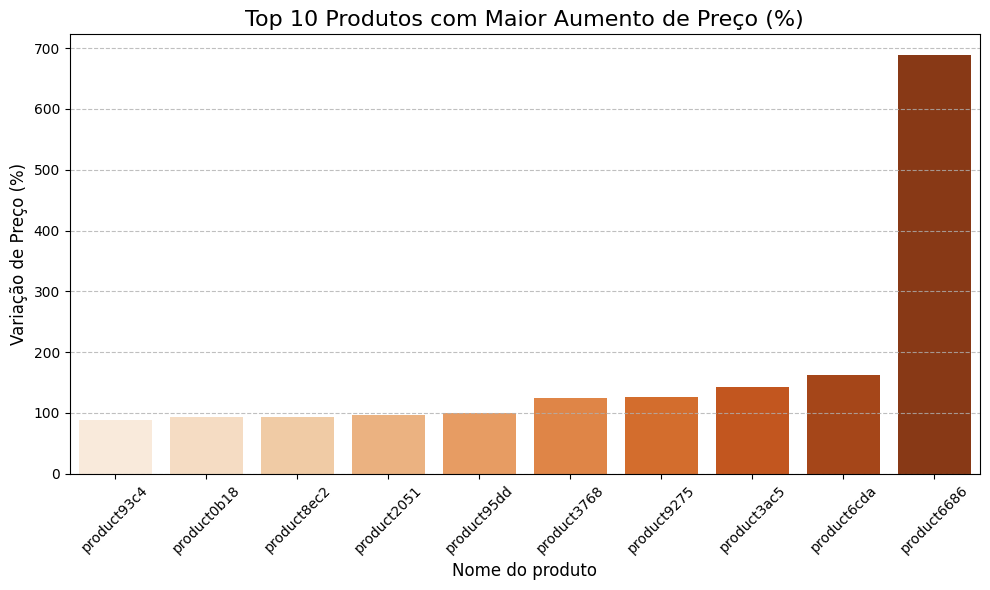

In [2178]:
plt.figure(figsize=(10, 6))
sns.barplot(x='product_name', y='price_variation_%', data=top_increase_sorted, hue='product_name', palette='Oranges')
plt.title('Top 10 Produtos com Maior Aumento de Preço (%)', fontsize=16)
plt.xlabel('Nome do produto', fontsize=12)
plt.ylabel('Variação de Preço (%)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

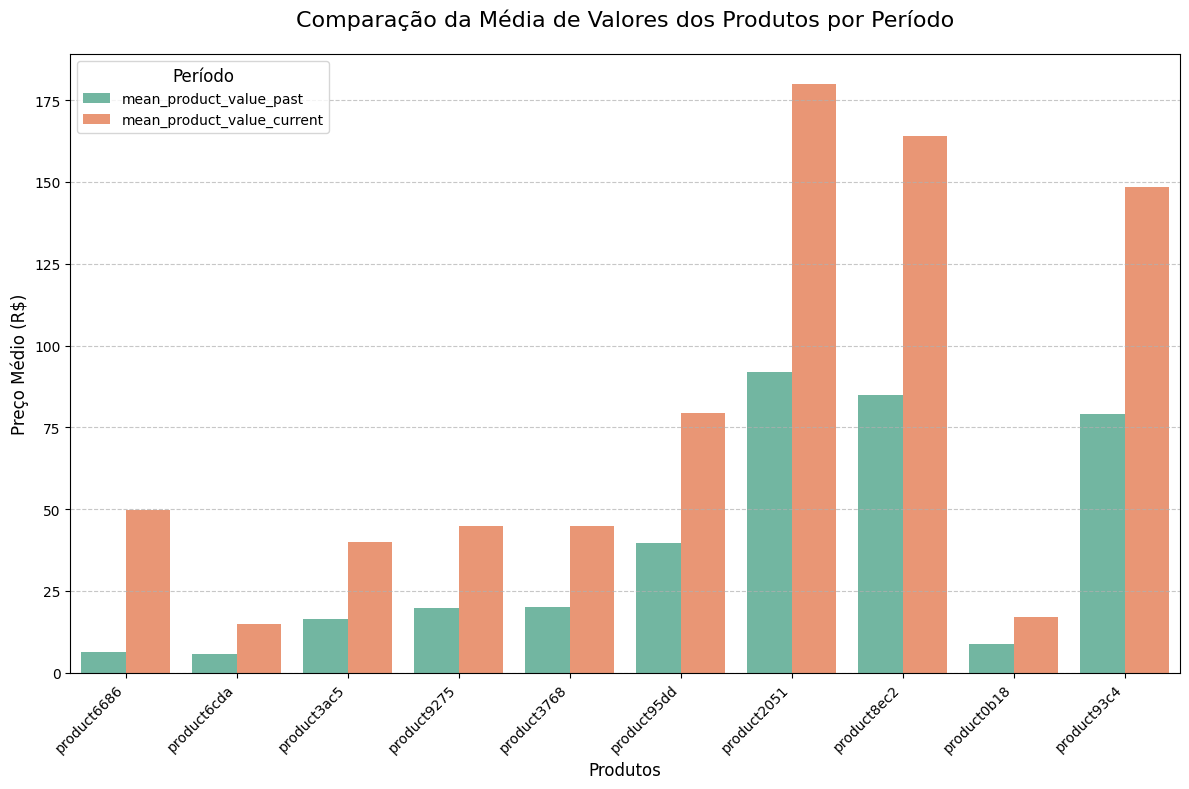

In [2179]:
mean_products_values_comparision = pd.melt(
    top_increase, 
    id_vars=['product_name'], 
    value_vars=['mean_product_value_past', 'mean_product_value_current'],
    var_name='period', 
    value_name='mean_price'
)

plt.figure(figsize=(12, 8))
sns.barplot(x='product_name', y='mean_price', hue='period', data=mean_products_values_comparision,palette='Set2')

plt.title('Comparação da Média de Valores dos Produtos por Período', fontsize=16, pad=20)
plt.xlabel('Produtos', fontsize=12)
plt.ylabel('Preço Médio (R$)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.legend(title='Período', title_fontsize=12, fontsize=10, loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

A ideia é utilizar a biblioteca **scikit-learn** para treinar um simples modelo que pode **prever o aumento do preço dos produtos com base em tendências**.

Excluindo coluna não útil para a análise

In [2180]:
columns_drop = order_items_df_cleaned2.columns[[1,4]]
order_items_df_cleaned3 = order_items_df_cleaned2.drop(columns=columns_drop, axis=1)
order_items_df_cleaned3.head()

,order_id,product_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90


### Merges

- Products com Order Items

In [2181]:
products_prices = pd.merge(products_df_cleaned, order_items_df_cleaned3, on='product_id', how='inner')
products_prices

,product_id,product_category_name,order_id,price
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce,10.91
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,5236307716393b7114b53ee991f36956,248.00
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,01f66e58769f84129811d43eefd187fb,79.80
3,cef67bcfe19066a932b7673e239eb23d,bebes,143d00a4f2dde4e0364ee1821577adb3,112.30
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,86cafb8794cb99a9b1b77fc8e48fbbbb,37.90
...,...,...,...,...
111042,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,59e88b7d3675e89aceaf86f372d3bc9a,29.90
111043,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,6e4465d771f02e4fe335225de3c6c043,29.90
111044,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,6e4465d771f02e4fe335225de3c6c043,29.90
111045,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,6e4465d771f02e4fe335225de3c6c043,29.90


Coluna nome do produto

In [2182]:
products_prices['product_name'] = 'product' + products_prices['product_id'].str[:4]

In [2183]:
products_prices

,product_id,product_category_name,order_id,price,product_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce,10.91,product1e9e
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,5236307716393b7114b53ee991f36956,248.00,product3aa0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,01f66e58769f84129811d43eefd187fb,79.80,product96bd
3,cef67bcfe19066a932b7673e239eb23d,bebes,143d00a4f2dde4e0364ee1821577adb3,112.30,productcef6
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,86cafb8794cb99a9b1b77fc8e48fbbbb,37.90,product9dc1
...,...,...,...,...,...
111042,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,59e88b7d3675e89aceaf86f372d3bc9a,29.90,product8380
111043,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,6e4465d771f02e4fe335225de3c6c043,29.90,product8380
111044,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,6e4465d771f02e4fe335225de3c6c043,29.90,product8380
111045,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,6e4465d771f02e4fe335225de3c6c043,29.90,product8380


- Merge com Orders

In [2184]:
columns_drop = orders_df_cleaned.columns[[1,2]]
orders_approved = orders_df_cleaned.drop(columns=columns_drop, axis=1)
orders_approved.head()

,order_id,order_approved_at
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 11:07:15
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-26 03:24:27
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:55:23
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:45:59
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 22:20:29


In [2185]:
products_prices = pd.merge(products_prices, orders_approved, on='order_id', how='inner')

In [2186]:
products_prices.head()

,product_id,product_category_name,order_id,price,product_name,order_approved_at
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce,10.91,product1e9e,2018-04-24 19:04:19
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,5236307716393b7114b53ee991f36956,248.00,product3aa0,2018-01-31 19:11:15
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,01f66e58769f84129811d43eefd187fb,79.80,product96bd,2018-07-09 21:30:20
3,cef67bcfe19066a932b7673e239eb23d,bebes,143d00a4f2dde4e0364ee1821577adb3,112.30,productcef6,2018-08-03 09:31:42
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,86cafb8794cb99a9b1b77fc8e48fbbbb,37.90,product9dc1,2018-04-11 01:30:23


### Valores faltantes

In [2187]:
products_prices.isnull().sum()

product_id               0
product_category_name    0
order_id                 0
price                    0
product_name             0
order_approved_at        0
dtype: int64

### Duplicatas

Muitas duplicatas ocorrem, pois existem diferentes preços para os produtos

In [2188]:
products_prices.duplicated().sum()

np.int64(7822)

In [2189]:
products_prices.product_id.value_counts()

product_id
aca2eb7d00ea1a7b8ebd4e68314663af    502
422879e10f46682990de24d770e7f83d    429
368c6c730842d78016ad823897a372db    355
389d119b48cf3043d311335e499d9c6b    344
53759a2ecddad2bb87a079a1f1519f73    320
                                   ... 
87a97ee722d5e544b3c929b36443b8b9      1
0901b25598b3ca109f48e16a52e2df1f      1
6d3dc397c315b4afa15c2cedda354740      1
5c04d019c44f9f7da2d2b9508871a243      1
735ddb7e24835030772ab80675939cf9      1
Name: count, Length: 25889, dtype: int64

A ideia é utilizar a **mediana dos valores do produto** para a tentativa de previsão do valor futuro.

Criando uma coluna que representa o mês da compra

In [2190]:
products_prices.head()

,product_id,product_category_name,order_id,price,product_name,order_approved_at
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce,10.91,product1e9e,2018-04-24 19:04:19
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,5236307716393b7114b53ee991f36956,248.00,product3aa0,2018-01-31 19:11:15
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,01f66e58769f84129811d43eefd187fb,79.80,product96bd,2018-07-09 21:30:20
3,cef67bcfe19066a932b7673e239eb23d,bebes,143d00a4f2dde4e0364ee1821577adb3,112.30,productcef6,2018-08-03 09:31:42
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,86cafb8794cb99a9b1b77fc8e48fbbbb,37.90,product9dc1,2018-04-11 01:30:23


### Agrupamento com a mediana de cada produto

In [2191]:
median_prices = products_prices.groupby(['product_name', 'order_month'])['price'].median().reset_index()

KeyError: 'order_month'

In [ ]:
median_prices.rename(columns={'price': 'median_product_price'})

In [ ]:
median_prices.dtypes

### Treinando um modelo para produtos únicos

In [ ]:
product_name = 'product0006' 
product_data = median_prices[median_prices['product_name'] == product_name]

In [ ]:
X = product_data[['month_numeric']]  # Variável independente (tempo numérico)
y = product_data['median_product_price']  # Variável dependente (preço)

### Visualização gráfica

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(X, y, 'o-', label='Preços Observados')  # Dados reais
plt.plot(future_months, future_predictions, 'x--', label='Previsão de Preços')  # Previsões
plt.xlabel('Tempo (Meses)')
plt.ylabel('Mediana dos Preços')
plt.title(f'Previsão de Preços para: {product_name}')
plt.legend()
plt.show()

# Análise de Produtos com Maior Diferença de Preço entre Vendas

Verificar quais produtos apresentam uma grande variação de preço nas vendas.

In [2192]:
merge_df8.head()

,product_id,product_category_name,order_id,order_item_id,price,freight_value,order_approved_at
0,37cc742be07708b53a98702e77a21a02,eletrodomesticos,1f11f0ab2b0ec59d0ec45f7f810a04f8,1,10.4,16.79,2017-06-15 07:10:06
1,7bb6f29c2be57716194f96496660c7c2,moveis_decoracao,4c4590c53b8582812e4bf510d3e55e58,1,59.9,17.70,2017-07-16 23:03:39
2,3bb7f144022e6732727d8d838a7b13b3,esporte_lazer,7f6209da874fb56bf2fd26791d83bcb8,1,26.7,11.85,2017-06-04 20:10:13
3,a1b71017a84f92fd8da4aeefba108a24,informatica_acessorios,bee9e2345c4d8f186d2aa7d57e1589f3,1,69.9,19.73,2017-05-24 18:35:17
4,1c1890ba1779090cd54008a3c3302921,moveis_decoracao,300ddfe520bd71c223ba642400982151,1,111.9,16.54,2017-06-04 21:10:14


In [2193]:
merge_df8.shape

(24286, 7)

In [2194]:
merge_df8.dtypes

product_id                       object
product_category_name            object
order_id                         object
order_item_id                     int64
price                           float64
freight_value                   float64
order_approved_at        datetime64[ns]
dtype: object

### Agrupamento 

Agrupamento de product_id com com preço, obtendo o mínimo e máximo

In [2204]:
price_range = merge_df8

In [2205]:
price_range = price_range.groupby('product_id')['price'].agg(['max', 'min']).reset_index()

In [2206]:
price_range.head()

,product_id,max,min
0,001b72dfd63e9833e8c02742adf472e3,34.99,34.99
1,001c5d71ac6ad696d22315953758fa04,79.90,79.90
2,00210e41887c2a8ef9f791ebc780cc36,33.99,32.98
3,002159fe700ed3521f46cfcf6e941c76,199.70,199.70
4,0021a87d4997a48b6cef1665602be0f5,29.00,29.00


In [2207]:
price_range['product_name'] = 'product' + price_range['product_id'].str[:4]

In [2208]:
price_range['price_diff'] = price_range['max'] - price_range['min']
price_range = price_range.sort_values(by='price_diff', ascending=False)

In [2209]:
top_price_range_products = price_range.head(10)

In [2211]:
top_price_range_products.head()

,product_id,max,min,product_name,price_diff
7564,cf8587a915960e2a8b57c5db574239ad,961.6,599.99,productcf85,361.61
285,07ecfc5bd0d3ca496facedede13afb80,1299.0,989.99,product07ec,309.01
7229,c6edce374ec89184d740f3e674add5f4,1299.0,999.99,productc6ed,299.01
4400,77ccda894b672fe1214b0101d108d7f7,672.0,418.00,product77cc,254.00
175,056063b2634974ef86ccb7da2d3d0dbf,729.0,499.00,product0560,230.00


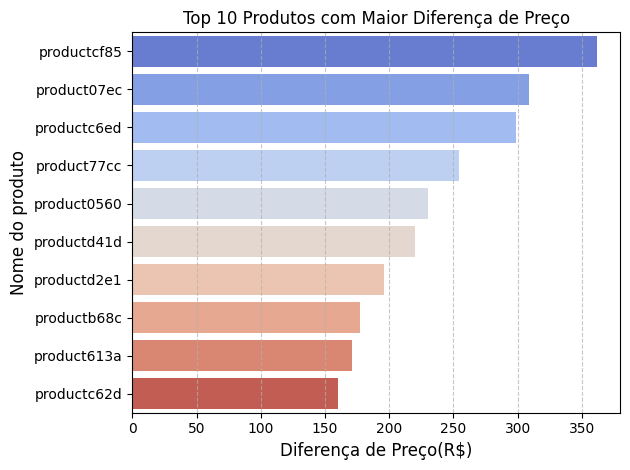

In [2216]:
sns.barplot(x='price_diff', y='product_name', data=top_price_range_products, palette='coolwarm', hue='product_name')
plt.title('Top 10 Produtos com Maior Diferença de Preço')
plt.xlabel('Diferença de Preço(R$)', fontsize=12)
plt.ylabel('Nome do produto', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()